In [1]:
### Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import sklearn
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
## Importing dataset
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### High Null values columns imputing

In [4]:
def null_count_percent(df):
    val = round(100 * df.isnull().sum()/len(df), 2)
    val = val.reset_index()
    val.columns = ['Column_Name','Percent']
    return val
    

In [5]:
tok1 = null_count_percent(df)

In [6]:
tok1[tok1['Percent'] > 10]

,Column_Name,Percent
157,date_of_last_rech_data_6,74.85
158,date_of_last_rech_data_7,74.43
159,date_of_last_rech_data_8,73.66
160,date_of_last_rech_data_9,74.08
161,total_rech_data_6,74.85
162,total_rech_data_7,74.43
163,total_rech_data_8,73.66
164,total_rech_data_9,74.08
165,max_rech_data_6,74.85
166,max_rech_data_7,74.43


In [7]:
dictionary = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

In [8]:
dictionary.head(40)

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [9]:
tok1

,Column_Name,Percent
0,mobile_number,0.00
1,circle_id,0.00
2,loc_og_t2o_mou,1.02
3,std_og_t2o_mou,1.02
4,loc_ic_t2o_mou,1.02
...,...,...
221,aon,0.00
222,aug_vbc_3g,0.00
223,jul_vbc_3g,0.00
224,jun_vbc_3g,0.00


In [10]:
high_null_columns = tok1[tok1['Percent'] > 10]

In [11]:
high_null_columns

,Column_Name,Percent
157,date_of_last_rech_data_6,74.85
158,date_of_last_rech_data_7,74.43
159,date_of_last_rech_data_8,73.66
160,date_of_last_rech_data_9,74.08
161,total_rech_data_6,74.85
162,total_rech_data_7,74.43
163,total_rech_data_8,73.66
164,total_rech_data_9,74.08
165,max_rech_data_6,74.85
166,max_rech_data_7,74.43


In [12]:
high_null_col_df = list(high_null_columns['Column_Name'])

In [13]:
df.shape

(99999, 226)

In [14]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [15]:
df['loc_og_t2o_mou'].isnull().sum()

1018

In [16]:
df['loc_og_t2o_mou'].describe()

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64

In [17]:
df.drop('loc_og_t2o_mou', axis=1, inplace=True)

In [18]:
df['std_og_t2o_mou'].describe()

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64

In [19]:
df.drop('std_og_t2o_mou', axis=1, inplace=True)

In [20]:
df['loc_ic_t2o_mou'].describe()

count    98981.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64

In [21]:
### Dropping loc_ic_t2o_mou columns due to all values equal to 0
df.drop('loc_ic_t2o_mou', axis=1, inplace=True)

In [22]:
## Dropping date columns

df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],
       axis=1, inplace=True)

In [23]:
df.drop(['arpu_6','arpu_7','arpu_8','arpu_9'], axis=1, inplace=True)

In [24]:
## Imputing null values for onnet_mou_6 column

percentile_array = [0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.99]
df['onnet_mou_6'].describe(percentile_array)

count    96062.000000
mean       132.395875
std        297.207406
min          0.000000
20%          4.310000
30%         11.060000
40%         20.610000
50%         34.310000
60%         55.390000
70%         91.090000
80%        158.906000
90%        344.102000
99%       1431.760500
max       7376.710000
Name: onnet_mou_6, dtype: float64

In [25]:
df['onnet_mou_6'].median()

34.31

In [26]:
df['onnet_mou_6'].mean()

132.39587453937398

In [27]:
df['onnet_mou_6'].fillna(df['onnet_mou_6'].median(), inplace=True)

In [28]:
## Imputing null values for onnet_mou_7 column

df['onnet_mou_7'].describe(percentile_array)

count    96140.000000
mean       133.670805
std        308.794148
min          0.000000
20%          3.830000
30%         10.024000
40%         19.060000
50%         32.330000
60%         52.948000
70%         87.696000
80%        158.182000
90%        348.035000
99%       1478.533300
max       8157.780000
Name: onnet_mou_7, dtype: float64

In [29]:
df['onnet_mou_7'].mean()

133.6708049719308

In [30]:
df['onnet_mou_7'].median()

32.33

In [31]:
df['onnet_mou_7'].fillna(df['onnet_mou_7'].median(), inplace=True)

In [32]:
## Imputing null values for onnet_mou_8 column

df['onnet_mou_8'].describe(percentile_array)

count    94621.000000
mean       133.018098
std        308.951589
min          0.000000
20%          3.710000
30%         10.010000
40%         19.160000
50%         32.360000
60%         52.630000
70%         87.960000
80%        156.840000
90%        345.030000
99%       1480.334000
max      10752.560000
Name: onnet_mou_8, dtype: float64

In [33]:
df['onnet_mou_8'].mean()

133.01809788526194

In [34]:
df['onnet_mou_8'].median()

32.36

In [35]:
df['onnet_mou_8'].fillna(df['onnet_mou_8'].median(), inplace=True)

In [36]:
## Imputing null values for onnet_mou_9 column

df['onnet_mou_9'].describe(percentile_array)

count    92254.000000
mean       130.302327
std        308.477668
min          0.000000
20%          2.760000
30%          8.510000
40%         16.980000
50%         29.840000
60%         49.990000
70%         84.162000
80%        152.890000
90%        342.890000
99%       1445.766400
max      10427.460000
Name: onnet_mou_9, dtype: float64

In [37]:
df['onnet_mou_8'].mean()

127.60465124652006

In [38]:
df['onnet_mou_8'].median()

32.36

In [39]:
df['onnet_mou_8'].fillna(df['onnet_mou_8'].median(), inplace=True)

In [40]:
## Imputing null values for onnet_mou_9 column

df['onnet_mou_9'].describe(percentile_array)

count    92254.000000
mean       130.302327
std        308.477668
min          0.000000
20%          2.760000
30%          8.510000
40%         16.980000
50%         29.840000
60%         49.990000
70%         84.162000
80%        152.890000
90%        342.890000
99%       1445.766400
max      10427.460000
Name: onnet_mou_9, dtype: float64

In [41]:
df['onnet_mou_9'].mean()

130.30232737877316

In [42]:
df['onnet_mou_9'].median()

29.84

In [43]:
df['onnet_mou_9'].fillna(df['onnet_mou_9'].median(), inplace=True)

In [44]:
## Imputing null values for offnet_mou_6 column

df['offnet_mou_6'].describe(percentile_array)

count    96062.000000
mean       197.935577
std        316.851613
min          0.000000
20%         25.040000
30%         44.680000
40%         67.390000
50%         96.310000
60%        135.352000
70%        191.780000
80%        283.806000
90%        477.325000
99%       1539.535800
max       8362.360000
Name: offnet_mou_6, dtype: float64

In [45]:
df['offnet_mou_6'].mean()

197.93557723138093

In [46]:
df['offnet_mou_6'].median()

96.31

In [47]:
df['offnet_mou_6'].fillna(df['offnet_mou_6'].median(), inplace=True)

In [48]:
## Imputing null values for offnet_mou_7 column

df['offnet_mou_7'].mean()

197.0451332431926

In [49]:
df['offnet_mou_7'].median()

91.735

In [50]:
df['offnet_mou_7'].fillna(df['offnet_mou_7'].median(), inplace=True)

In [51]:
## Imputing null values for offnet_mou_8 column

df['offnet_mou_8'].describe(percentile_array)

count    94621.000000
mean       196.574803
std        327.170662
min          0.000000
20%         22.510000
30%         41.580000
40%         63.710000
50%         92.140000
60%        130.630000
70%        186.880000
80%        281.440000
90%        486.310000
99%       1530.398000
max      14007.340000
Name: offnet_mou_8, dtype: float64

In [52]:
df['offnet_mou_8'].mean()

196.57480284504308

In [53]:
df['offnet_mou_8'].median()

92.14

In [54]:
df['offnet_mou_8'].fillna(df['offnet_mou_8'].median(), inplace=True)

In [55]:
## Imputing null values for offnet_mou_9 column

df['offnet_mou_9'].describe(percentile_array)

count    92254.000000
mean       190.337222
std        319.396092
min          0.000000
20%         18.310000
30%         36.910000
40%         59.294000
50%         87.290000
60%        124.838000
70%        180.892000
80%        273.022000
90%        471.031000
99%       1521.328700
max      10310.760000
Name: offnet_mou_9, dtype: float64

In [56]:
df['offnet_mou_9'].mean()

190.3372221258814

In [57]:
df['offnet_mou_9'].median()

87.29

In [58]:
df['offnet_mou_9'].fillna(df['offnet_mou_9'].median(), inplace=True)

In [59]:
## Imputing null values for roam_ic_mou_6 column

df['roam_ic_mou_6'].describe(percentile_array)

count    96062.000000
mean         9.950013
std         72.825411
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.060000
90%         11.810000
99%        219.847000
max      13724.380000
Name: roam_ic_mou_6, dtype: float64

In [60]:
df['roam_ic_mou_6'].mean()

9.950013324727992

In [61]:
df['roam_ic_mou_6'].median()

0.0

In [62]:
df['roam_ic_mou_6'].fillna(df['roam_ic_mou_6'].mean(), inplace=True)

In [63]:
## Imputing null values for roam_ic_mou_7 column

df['roam_ic_mou_7'].describe(percentile_array)

count    96140.000000
mean         7.149898
std         73.447948
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          5.060000
99%        154.483200
max      15371.040000
Name: roam_ic_mou_7, dtype: float64

In [64]:
df['roam_ic_mou_7'].mean()

7.149898481381532

In [65]:
df['roam_ic_mou_7'].median()

0.0

In [66]:
df['roam_ic_mou_7'].fillna(df['roam_ic_mou_7'].mean(), inplace=True)

In [67]:
## Imputing null values for roam_ic_mou_8 column

df['roam_ic_mou_8'].describe(percentile_array)

count    94621.000000
mean         7.292981
std         68.402466
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          5.340000
99%        162.940000
max      13095.360000
Name: roam_ic_mou_8, dtype: float64

In [68]:
df['roam_ic_mou_8'].mean()

7.292981050718291

In [69]:
df['roam_ic_mou_8'].median()

0.0

In [70]:
df['roam_ic_mou_8'].fillna(df['roam_ic_mou_8'].mean(), inplace=True)

In [71]:
## Imputing null values for roam_ic_mou_9 column

df['roam_ic_mou_9'].describe(percentile_array)

count    92254.000000
mean         6.343841
std         57.137537
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          3.630000
99%        140.983500
max       8464.030000
Name: roam_ic_mou_9, dtype: float64

In [72]:
df['roam_ic_mou_9'].mean()

6.343840700674353

In [73]:
df['roam_ic_mou_9'].median()

0.0

In [74]:
df['roam_ic_mou_9'].isnull().sum()

7745

In [75]:
df['roam_ic_mou_9'].describe()

count    92254.000000
mean         6.343841
std         57.137537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       8464.030000
Name: roam_ic_mou_9, dtype: float64

In [76]:
df['roam_ic_mou_9'].mean()

6.343840700674353

In [77]:
df['roam_ic_mou_9'].median()

0.0

In [78]:
df['roam_ic_mou_9'].fillna(df['roam_ic_mou_9'].mean(), inplace=True)

In [79]:
## Imputing null values for roam_og_mou_6 column

df['roam_og_mou_6'].describe()

count    96062.000000
mean        13.911337
std         71.443196
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3775.110000
Name: roam_og_mou_6, dtype: float64

In [80]:
df['roam_og_mou_6'].isnull().sum()

3937

In [81]:
df['roam_og_mou_6'].describe(percentile_array)

count    96062.000000
mean        13.911337
std         71.443196
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.160000
90%         22.480000
99%        285.995800
max       3775.110000
Name: roam_og_mou_6, dtype: float64

In [82]:
df['roam_og_mou_6'].mean()

13.911337365451457

In [83]:
df['roam_og_mou_6'].median()

0.0

In [84]:
df['roam_og_mou_6'].fillna(df['roam_og_mou_6'].mean(), inplace=True)

In [85]:
## Imputing null values for roam_og_mou_7 column

df['roam_og_mou_7'].describe()

count    96140.000000
mean         9.818732
std         58.455762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2812.040000
Name: roam_og_mou_7, dtype: float64

In [86]:
df['roam_og_mou_7'].isnull().sum()

3859

In [87]:
df['roam_og_mou_7'].describe(percentile_array)

count    96140.000000
mean         9.818732
std         58.455762
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          9.930000
99%        220.988600
max       2812.040000
Name: roam_og_mou_7, dtype: float64

In [88]:
df['roam_og_mou_7'].mean()

9.81873216143149

In [89]:
df['roam_og_mou_7'].median()

0.0

In [90]:
df['roam_og_mou_7'].fillna(df['roam_og_mou_7'].mean(), inplace=True)

In [91]:
## Imputing null values for roam_og_mou_8 column

df['roam_og_mou_8'].describe(percentile_array)

count    94621.000000
mean         9.971890
std         64.713221
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          9.130000
99%        222.180000
max       5337.040000
Name: roam_og_mou_8, dtype: float64

In [92]:
df['roam_og_mou_7'].mean()

9.818732161431255

In [93]:
df['roam_og_mou_7'].median()

0.0

In [94]:
df['roam_og_mou_7'].fillna(df['roam_og_mou_7'].mean(), inplace=True)

In [95]:
## Imputing null values for roam_og_mou_8 column

df['roam_og_mou_8'].describe(percentile_array)

count    94621.000000
mean         9.971890
std         64.713221
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          9.130000
99%        222.180000
max       5337.040000
Name: roam_og_mou_8, dtype: float64

In [96]:
df['roam_og_mou_8'].mean()

9.971890278056849

In [97]:
df['roam_og_mou_8'].median()

0.0

In [98]:
df['roam_og_mou_8'].fillna(df['roam_og_mou_8'].mean(), inplace=True)

In [99]:
## Imputing null values for roam_og_mou_9 column

df['roam_og_mou_9'].describe(percentile_array)

count    92254.000000
mean         8.555519
std         58.438186
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          6.060000
99%        192.789900
max       4428.460000
Name: roam_og_mou_9, dtype: float64

In [100]:
df['roam_og_mou_9'].mean()

8.555519001886328

In [101]:
df['roam_og_mou_9'].median()

0.0

In [102]:
df['roam_og_mou_9'].isnull().sum()

7745

In [103]:
df['roam_og_mou_9'].fillna(df['roam_og_mou_9'].mean(), inplace=True)

In [104]:
## Imputing null values for loc_og_t2t_mou_6 column

df['loc_og_t2t_mou_6'].describe(percentile_array)

count    96062.000000
mean        47.100763
std        150.856393
min          0.000000
20%          0.630000
30%          3.010000
40%          6.590000
50%         11.910000
60%         19.710000
70%         31.930000
80%         53.440000
90%        104.685000
99%        551.005500
max       6431.330000
Name: loc_og_t2t_mou_6, dtype: float64

In [105]:
df['loc_og_t2t_mou_6'].mean()

47.10076252836502

In [106]:
df['loc_og_t2t_mou_6'].median()

11.91

In [107]:
df['loc_og_t2t_mou_6'].fillna(df['loc_og_t2t_mou_6'].median(), inplace=True)

In [108]:
## Imputing null values for loc_og_t2t_mou_7 column

df['loc_og_t2t_mou_7'].describe(percentile_array)

count    96140.000000
mean        46.473010
std        155.318705
min          0.000000
20%          0.640000
30%          2.900000
40%          6.460000
50%         11.610000
60%         19.180000
70%         31.040000
80%         51.994000
90%        101.890000
99%        538.332500
max       7400.660000
Name: loc_og_t2t_mou_7, dtype: float64

In [109]:
df['loc_og_t2t_mou_7'].mean()

46.47300998543579

In [110]:
df['loc_og_t2t_mou_7'].median()

11.61

In [111]:
df['loc_og_t2t_mou_7'].fillna(df['loc_og_t2t_mou_7'].median(), inplace=True)

In [112]:
## Imputing null values for loc_og_t2t_mou_8 column

df['loc_og_t2t_mou_8'].describe(percentile_array)

count    94621.000000
mean        45.887806
std        151.184830
min          0.000000
20%          0.630000
30%          2.910000
40%          6.510000
50%         11.730000
60%         19.380000
70%         31.390000
80%         52.080000
90%        102.630000
99%        531.522000
max      10752.560000
Name: loc_og_t2t_mou_8, dtype: float64

In [113]:
df['loc_og_t2t_mou_8'].mean()

45.887806195238404

In [114]:
df['loc_og_t2t_mou_8'].median()

11.73

In [115]:
df['loc_og_t2t_mou_8'].fillna(df['loc_og_t2t_mou_8'].median(), inplace=True)

In [116]:
## Imputing null values for loc_og_t2t_mou_9 column


df['loc_og_t2t_mou_9'].describe(percentile_array)

count    92254.000000
mean        44.584446
std        147.995390
min          0.000000
20%          0.460000
30%          2.630000
40%          6.132000
50%         11.260000
60%         18.690000
70%         30.580000
80%         51.260000
90%         99.560000
99%        513.996400
max      10389.240000
Name: loc_og_t2t_mou_9, dtype: float64

In [117]:
df['loc_og_t2t_mou_9'].median()

11.26

In [118]:
df['loc_og_t2t_mou_9'].mean()

44.584445552492205

In [119]:
df['loc_og_t2t_mou_9'].fillna(df['loc_og_t2t_mou_9'].median(), inplace=True)

In [120]:
## Imputing null values for loc_og_t2m_mou_6 column

df['loc_og_t2m_mou_6'].describe(percentile_array)

count    96062.000000
mean        93.342088
std        162.780544
min          0.000000
20%          5.780000
30%         14.530000
40%         26.130000
50%         41.030000
60%         60.940000
70%         90.210000
80%        136.776000
90%        234.978000
99%        745.931400
max       4729.740000
Name: loc_og_t2m_mou_6, dtype: float64

In [121]:
df['loc_og_t2m_mou_6'].mean()

93.34208833879151

In [122]:
df['loc_og_t2m_mou_6'].median()

41.03

In [123]:
df['loc_og_t2m_mou_6'].fillna(df['loc_og_t2m_mou_6'].median(), inplace=True)

In [124]:
## Imputing null values for loc_og_t2m_mou_7 column

df['loc_og_t2m_mou_7'].describe(percentile_array)

count    96140.000000
mean        91.397131
std        157.492308
min          0.000000
20%          5.990000
30%         14.710000
40%         25.890000
50%         40.430000
60%         59.560000
70%         87.910000
80%        134.290000
90%        228.942000
99%        734.594800
max       4557.140000
Name: loc_og_t2m_mou_7, dtype: float64

In [125]:
df['loc_og_t2m_mou_7'].mean()

91.39713137092691

In [126]:
df['loc_og_t2m_mou_7'].median()

40.43

In [127]:
df['loc_og_t2m_mou_7'].fillna(df['loc_og_t2m_mou_7'].median(), inplace=True)

In [128]:
## Imputing null values for loc_og_t2m_mou_8 column

df['loc_og_t2m_mou_8'].describe(percentile_array)

count    94621.000000
mean        91.755128
std        156.537048
min          0.000000
20%          5.730000
30%         14.540000
40%         25.830000
50%         40.360000
60%         60.080000
70%         88.930000
80%        135.380000
90%        231.430000
99%        737.534000
max       4961.330000
Name: loc_og_t2m_mou_8, dtype: float64

In [129]:
df['loc_og_t2m_mou_8'].mean()

91.75512814281123

In [130]:
df['loc_og_t2m_mou_8'].median()

40.36

In [131]:
df['loc_og_t2m_mou_8'].fillna(df['loc_og_t2m_mou_8'].median(), inplace=True)

In [132]:
## Imputing null values for loc_og_t2m_mou_9 column

df['loc_og_t2m_mou_9'].describe(percentile_array)

count    92254.000000
mean        90.463192
std        158.681454
min          0.000000
20%          4.950000
30%         13.380000
40%         24.480000
50%         39.120000
60%         59.110000
70%         87.430000
80%        132.680000
90%        227.740000
99%        722.759500
max       4429.880000
Name: loc_og_t2m_mou_9, dtype: float64

In [133]:
df['loc_og_t2m_mou_9'].mean()

90.46319216511753

In [134]:
df['loc_og_t2m_mou_9'].median()

39.120000000000005

In [135]:
df['loc_og_t2m_mou_9'].fillna(df['loc_og_t2m_mou_9'].median(), inplace=True)

In [136]:
## Imputing null values for loc_og_t2f_mou_6 column

df['loc_og_t2f_mou_6'].describe(percentile_array)

count    96062.000000
mean         3.751013
std         14.230438
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.200000
70%          1.230000
80%          3.410000
90%          9.509000
99%         54.917800
max       1466.030000
Name: loc_og_t2f_mou_6, dtype: float64

In [137]:
df['loc_og_t2f_mou_6'].mean()

3.751013199808491

In [138]:
df['loc_og_t2f_mou_6'].median()

0.0

In [139]:
df['loc_og_t2f_mou_6'].isnull().sum()

3937

In [140]:
df['loc_og_t2f_mou_6'].fillna(df['loc_og_t2f_mou_6'].mean(), inplace=True)

In [141]:
## Imputing null values for loc_og_t2f_mou_7 column


df['loc_og_t2f_mou_7'].describe(percentile_array)

count    96140.000000
mean         3.792985
std         14.264986
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.230000
70%          1.250000
80%          3.430000
90%          9.600000
99%         55.736100
max       1196.430000
Name: loc_og_t2f_mou_7, dtype: float64

In [142]:
df['loc_og_t2f_mou_7'].isnull().sum()

3859

In [143]:
df['loc_og_t2f_mou_7'].mean()

3.792985333888139

In [144]:
df['loc_og_t2f_mou_7'].median()

0.0

In [145]:
df['loc_og_t2f_mou_7'].fillna(df['loc_og_t2f_mou_7'].mean(), inplace=True)

In [146]:
## Imputing null values for loc_og_t2f_mou_8 column


df['loc_og_t2f_mou_8'].describe(percentile_array)

count    94621.000000
mean         3.677991
std         13.270996
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.200000
70%          1.200000
80%          3.330000
90%          9.350000
99%         54.876000
max        928.490000
Name: loc_og_t2f_mou_8, dtype: float64

In [147]:
df['loc_og_t2f_mou_8'].mean()

3.6779906151911654

In [148]:
df['loc_og_t2f_mou_8'].median()

0.0

In [149]:
df['loc_og_t2f_mou_8'].isnull().sum()

5378

In [150]:
df['loc_og_t2f_mou_8'].fillna(df['loc_og_t2f_mou_8'].mean(), inplace=True)

In [151]:
## Imputing null values for loc_og_t2f_mou_9 column


df['loc_og_t2f_mou_9'].describe(percentile_array)

count    92254.000000
mean         3.655123
std         13.457549
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.130000
70%          1.110000
80%          3.200000
90%          9.230000
99%         55.169400
max        927.410000
Name: loc_og_t2f_mou_9, dtype: float64

In [152]:
df['loc_og_t2f_mou_9'].mean()

3.655123246688481

In [153]:
df['loc_og_t2f_mou_9'].median()

0.0

In [154]:
df['loc_og_t2f_mou_9'].isnull().sum()

7745

In [155]:
df['loc_og_t2f_mou_9'].fillna(df['loc_og_t2f_mou_9'].mean(), inplace=True)

In [156]:
## Imputing null values for loc_og_t2c_mou_6 column


df['loc_og_t2c_mou_6'].describe(percentile_array)

count    96062.000000
mean         1.123056
std          5.448946
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          2.480000
99%         20.433900
max        342.860000
Name: loc_og_t2c_mou_6, dtype: float64

In [157]:
df['loc_og_t2c_mou_6'].mean()

1.1230561512356492

In [158]:
df['loc_og_t2c_mou_6'].median()

0.0

In [159]:
df['loc_og_t2c_mou_6'].isnull().sum()

3937

In [160]:
df['loc_og_t2c_mou_6'].fillna(df['loc_og_t2c_mou_6'].mean(), inplace=True)

In [161]:
## Imputing null values for loc_og_t2c_mou_7 column

df['loc_og_t2c_mou_7'].describe(percentile_array)

count    96140.000000
mean         1.368500
std          7.533445
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.110000
90%          3.110000
99%         23.572200
max        916.240000
Name: loc_og_t2c_mou_7, dtype: float64

In [162]:
df['loc_og_t2c_mou_7'].mean()

1.368500312044925

In [163]:
df['loc_og_t2c_mou_7'].median()

0.0

In [164]:
df['loc_og_t2c_mou_7'].fillna(df['loc_og_t2c_mou_7'].mean(), inplace=True)

In [165]:
## Imputing null values for loc_og_t2c_mou_8 column

df['loc_og_t2c_mou_8'].isnull().sum()

5378

In [166]:
df['loc_og_t2c_mou_8'].describe(percentile_array)

count    94621.000000
mean         1.433821
std          6.783335
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.260000
90%          3.430000
99%         24.838000
max        502.090000
Name: loc_og_t2c_mou_8, dtype: float64

In [167]:
df['loc_og_t2c_mou_8'].mean()

1.4338205049618733

In [168]:
df['loc_og_t2c_mou_8'].median()

0.0

In [169]:
df['loc_og_t2c_mou_8'].fillna(df['loc_og_t2c_mou_8'].mean(), inplace=True)

In [170]:
## Imputing null values for loc_og_t2c_mou_9 column

df['loc_og_t2c_mou_9'].describe(percentile_array)

count    92254.000000
mean         1.232726
std          5.619021
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.110000
90%          2.830000
99%         21.940000
max        339.840000
Name: loc_og_t2c_mou_9, dtype: float64

In [171]:
df['loc_og_t2c_mou_9'].describe(percentile_array)

count    92254.000000
mean         1.232726
std          5.619021
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.110000
90%          2.830000
99%         21.940000
max        339.840000
Name: loc_og_t2c_mou_9, dtype: float64

In [172]:
df['loc_og_t2c_mou_9'].mean()

1.2327258438658433

In [173]:
df['loc_og_t2c_mou_9'].median()

0.0

In [174]:
df['loc_og_t2c_mou_9'].fillna(df['loc_og_t2c_mou_9'].mean(), inplace=True)

In [175]:
## Imputing null values for loc_og_mou_6 column

df['loc_og_mou_6'].describe(percentile_array)

count    96062.000000
mean       144.201175
std        251.751489
min          0.000000
20%         10.540000
30%         24.680000
40%         42.660000
50%         65.110000
60%         95.330000
70%        138.540000
80%        209.538000
90%        356.908000
99%       1164.105700
max      10643.380000
Name: loc_og_mou_6, dtype: float64

In [176]:
df['loc_og_mou_6'].mean()

144.20117476214858

In [177]:
df['loc_og_mou_6'].median()

65.11

In [178]:
df['loc_og_mou_6'].isnull().sum()

3937

In [179]:
df['loc_og_mou_6'].fillna(df['loc_og_mou_6'].median(), inplace=True)

In [180]:
## Imputing null values for loc_og_mou_7 column

df['loc_og_mou_7'].describe(percentile_array)

count    96140.000000
mean       141.670476
std        248.731086
min          0.000000
20%         10.860000
30%         24.990000
40%         42.190000
50%         63.685000
60%         92.698000
70%        135.060000
80%        204.082000
90%        348.492000
99%       1140.630400
max       7674.780000
Name: loc_og_mou_7, dtype: float64

In [181]:
df['loc_og_mou_7'].mean()

141.6704760765713

In [182]:
df['loc_og_mou_7'].median()

63.685

In [183]:
df['loc_og_mou_7'].isnull().sum()

3859

In [184]:
df['loc_og_mou_7'].fillna(df['loc_og_mou_7'].median(), inplace=True)

In [185]:
## Imputing null values for loc_og_mou_8 column

df['loc_og_mou_8'].isnull().sum()

5378

In [186]:
df['loc_og_mou_8'].describe(percentile_array)

count    94621.000000
mean       141.328209
std        245.914311
min          0.000000
20%         10.490000
30%         24.590000
40%         41.860000
50%         63.730000
60%         93.240000
70%        136.610000
80%        205.740000
90%        349.910000
99%       1127.196000
max      11039.910000
Name: loc_og_mou_8, dtype: float64

In [187]:
df['loc_og_mou_8'].mean()

141.32820938271138

In [188]:
df['loc_og_mou_8'].median()

63.73

In [189]:
df['loc_og_mou_8'].fillna(df['loc_og_mou_8'].median(), inplace=True)

In [190]:
## Imputing null values for loc_og_mou_9 column

df['loc_og_mou_9'].describe(percentile_array)

count    92254.000000
mean       138.709970
std        245.934517
min          0.000000
20%          9.110000
30%         22.710000
40%         39.780000
50%         61.840000
60%         91.434000
70%        133.380000
80%        202.460000
90%        344.503000
99%       1115.749200
max      11099.260000
Name: loc_og_mou_9, dtype: float64

In [191]:
df['loc_og_mou_9'].mean()

138.70996986581912

In [192]:
df['loc_og_mou_9'].median()

61.84

In [193]:
df['loc_og_mou_9'].isnull().sum()

7745

In [194]:
df['loc_og_mou_9'].fillna(df['loc_og_mou_9'].median(), inplace=True)

In [195]:
## Imputing null values for std_og_t2t_mou_6 column

df['std_og_t2t_mou_6'].isnull().sum()

3937

In [196]:
df['std_og_t2t_mou_6'].describe(percentile_array)

count    96062.000000
mean        79.829870
std        252.476533
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          2.460000
70%         15.610000
80%         58.790000
90%        215.639000
99%       1214.527500
max       7366.580000
Name: std_og_t2t_mou_6, dtype: float64

In [197]:
df['std_og_t2t_mou_6'].mean()

79.82987029210655

In [198]:
df['std_og_t2t_mou_6'].median()

0.0

In [199]:
df['std_og_t2t_mou_6'].fillna(df['std_og_t2t_mou_6'].mean(), inplace=True)

In [200]:
## Imputing null values for std_og_t2t_mou_7 column

df['std_og_t2t_mou_7'].isnull().sum()

3859

In [201]:
df['std_og_t2t_mou_7'].describe(percentile_array)

count    96140.000000
mean        83.299598
std        263.631042
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          2.460000
70%         15.780000
80%         60.110000
90%        226.433000
99%       1282.982000
max       8133.660000
Name: std_og_t2t_mou_7, dtype: float64

In [202]:
df['std_og_t2t_mou_7'].mean()

83.29959777408243

In [203]:
df['std_og_t2t_mou_7'].median()

0.0

In [204]:
df['std_og_t2t_mou_7'].fillna(df['std_og_t2t_mou_7'].mean(), inplace=True)

In [205]:
## Imputing null values for std_og_t2t_mou_8 column

df['std_og_t2t_mou_8'].describe(percentile_array)

count    94621.000000
mean        83.282673
std        265.486090
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          2.080000
70%         15.080000
80%         59.340000
90%        225.510000
99%       1282.738000
max       8014.430000
Name: std_og_t2t_mou_8, dtype: float64

In [206]:
df['std_og_t2t_mou_8'].mean()

83.28267329662941

In [207]:
df['std_og_t2t_mou_8'].median()

0.0

In [208]:
df['std_og_t2t_mou_8'].fillna(df['std_og_t2t_mou_8'].mean(), inplace=True)

In [209]:
## Imputing null values for std_og_t2t_mou_9 column

df['std_og_t2t_mou_9'].describe(percentile_array)

count    92254.000000
mean        82.342919
std        267.184991
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.430000
70%         13.180000
80%         57.034000
90%        223.187000
99%       1254.957400
max       9382.580000
Name: std_og_t2t_mou_9, dtype: float64

In [210]:
df['std_og_t2t_mou_9'].mean()

82.34291922301702

In [211]:
df['std_og_t2t_mou_9'].median()

0.0

In [212]:
df['std_og_t2t_mou_9'].fillna(df['std_og_t2t_mou_9'].mean(), inplace=True)

In [213]:
## Imputing null values for std_og_t2m_mou_6 column

df['std_og_t2m_mou_6'].describe(percentile_array)

count    96062.000000
mean        87.299624
std        255.617850
min          0.000000
20%          0.000000
30%          0.000000
40%          0.410000
50%          3.950000
60%         13.030000
70%         34.187000
80%         84.780000
90%        234.540000
99%       1234.421700
max       8314.760000
Name: std_og_t2m_mou_6, dtype: float64

In [214]:
df['std_og_t2m_mou_6'].mean()

87.2996237846432

In [215]:
df['std_og_t2m_mou_6'].median()

3.95

In [216]:
df['std_og_t2m_mou_6'].isnull().sum()

3937

In [217]:
df['std_og_t2m_mou_6'].fillna(df['std_og_t2m_mou_6'].mean(), inplace=True)

In [218]:
## Imputing null values for std_og_t2m_mou_7 column

df['std_og_t2m_mou_7'].describe(percentile_array)

count    96140.000000
mean        90.804137
std        269.347911
min          0.000000
20%          0.000000
30%          0.000000
40%          0.210000
50%          3.635000
60%         12.740000
70%         34.040000
80%         86.082000
90%        244.680000
99%       1269.963000
max       9284.740000
Name: std_og_t2m_mou_7, dtype: float64

In [219]:
df['std_og_t2m_mou_7'].median()

3.635

In [220]:
df['std_og_t2m_mou_7'].mean()

90.80413719576167

In [221]:
df['std_og_t2m_mou_7'].fillna(df['std_og_t2m_mou_7'].mean(), inplace=True)

In [222]:
## Imputing null values for std_og_t2m_mou_8 column

df['std_og_t2m_mou_8'].isnull().sum()

5378

In [223]:
df['std_og_t2m_mou_8'].describe(percentile_array)

count    94621.000000
mean        89.838390
std        271.757783
min          0.000000
20%          0.000000
30%          0.000000
40%          0.050000
50%          3.310000
60%         12.260000
70%         32.840000
80%         85.130000
90%        244.860000
99%       1230.696000
max      13950.040000
Name: std_og_t2m_mou_8, dtype: float64

In [224]:
df['std_og_t2m_mou_8'].mean()

89.83838989231208

In [225]:
df['std_og_t2m_mou_8'].median()

3.31

In [226]:
df['std_og_t2m_mou_8'].fillna(df['std_og_t2m_mou_8'].mean(), inplace=True)

In [227]:
## Imputing null values for std_og_t2m_mou_9 column

df['std_og_t2m_mou_9'].isnull().sum()

7745

In [228]:
df['std_og_t2m_mou_9'].mean()

86.27662247707777

In [229]:
df['std_og_t2m_mou_9'].median()

2.5

In [230]:
df['std_og_t2m_mou_9'].describe(percentile_array)

count    92254.000000
mean        86.276622
std        261.407396
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          2.500000
60%         10.288000
70%         29.840000
80%         78.718000
90%        233.140000
99%       1229.500500
max      10223.430000
Name: std_og_t2m_mou_9, dtype: float64

In [231]:
df['std_og_t2m_mou_9'].fillna(df['std_og_t2m_mou_9'].mean(), inplace=True)

In [232]:
## Imputing null values for std_og_t2f_mou_6 column

df['std_og_t2f_mou_6'].describe(percentile_array)

count    96062.000000
mean         1.129011
std          7.984970
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.660000
99%         25.703900
max        628.560000
Name: std_og_t2f_mou_6, dtype: float64

In [233]:
df['std_og_t2f_mou_6'].mean()

1.129010743061767

In [234]:
df['std_og_t2f_mou_6'].median()

0.0

In [235]:
df['std_og_t2f_mou_6'].fillna(df['std_og_t2f_mou_6'].mean(), inplace=True)

In [236]:
## Imputing null values for std_og_t2f_mou_7 column

df['std_og_t2f_mou_7'].describe(percentile_array)

count    96140.000000
mean         1.115010
std          8.599406
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.500000
99%         24.860000
max        544.630000
Name: std_og_t2f_mou_7, dtype: float64

In [237]:
df['std_og_t2f_mou_7'].mean()

1.1150101934678527

In [238]:
df['std_og_t2f_mou_7'].median()

0.0

In [239]:
df['std_og_t2f_mou_7'].fillna(df['std_og_t2f_mou_7'].mean(), inplace=True)

In [240]:
## Imputing null values for std_og_t2f_mou_8 column

df['std_og_t2f_mou_8'].describe(percentile_array)

count    94621.000000
mean         1.067792
std          7.905971
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.500000
99%         24.288000
max        516.910000
Name: std_og_t2f_mou_8, dtype: float64

In [241]:
df['std_og_t2f_mou_8'].mean()

1.0677916107417995

In [242]:
df['std_og_t2f_mou_8'].isnull().sum()

5378

In [243]:
df['std_og_t2f_mou_8'].median()

0.0

In [244]:
df['std_og_t2f_mou_8'].fillna(df['std_og_t2f_mou_8'].mean(), inplace=True)

In [245]:
## Imputing null values for std_og_t2f_mou_9 column

df['std_og_t2f_mou_9'].describe(percentile_array)

count    92254.000000
mean         1.042362
std          8.261770
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.430000
99%         24.169400
max        808.490000
Name: std_og_t2f_mou_9, dtype: float64

In [246]:
df['std_og_t2f_mou_9'].mean()

1.0423620656014938

In [247]:
df['std_og_t2f_mou_9'].median()

0.0

In [248]:
df['std_og_t2f_mou_9'].isnull().sum()

7745

In [249]:
df['std_og_t2f_mou_9'].fillna(df['std_og_t2f_mou_9'].mean(), inplace=True)

In [250]:
## Imputing null values for std_og_t2c_mou_6 column

df['std_og_t2c_mou_6'].describe(percentile_array)

count    96062.0
mean         0.0
std          0.0
min          0.0
20%          0.0
30%          0.0
40%          0.0
50%          0.0
60%          0.0
70%          0.0
80%          0.0
90%          0.0
99%          0.0
max          0.0
Name: std_og_t2c_mou_6, dtype: float64

In [251]:
df['std_og_t2c_mou_6'].mean()

0.0

In [252]:
df['std_og_t2c_mou_6'].median()

0.0

In [253]:
df['std_og_t2c_mou_6'].fillna(df['std_og_t2c_mou_6'].mean(), inplace=True)

In [254]:
## Imputing null values for std_og_t2c_mou_7 column

df['std_og_t2c_mou_7'].describe(percentile_array)

count    96140.0
mean         0.0
std          0.0
min          0.0
20%          0.0
30%          0.0
40%          0.0
50%          0.0
60%          0.0
70%          0.0
80%          0.0
90%          0.0
99%          0.0
max          0.0
Name: std_og_t2c_mou_7, dtype: float64

In [255]:
df['std_og_t2c_mou_7'].fillna(0, inplace=True)

In [256]:
## Imputing null values for std_og_t2c_mou_8 column

df['std_og_t2c_mou_8'].describe(percentile_array)

count    94621.0
mean         0.0
std          0.0
min          0.0
20%          0.0
30%          0.0
40%          0.0
50%          0.0
60%          0.0
70%          0.0
80%          0.0
90%          0.0
99%          0.0
max          0.0
Name: std_og_t2c_mou_8, dtype: float64

In [257]:
df['std_og_t2c_mou_8'].fillna(0,inplace=True)

In [258]:
## Imputing null values for std_og_t2c_mou_9 column

df['std_og_t2c_mou_9'].describe(percentile_array)

count    92254.0
mean         0.0
std          0.0
min          0.0
20%          0.0
30%          0.0
40%          0.0
50%          0.0
60%          0.0
70%          0.0
80%          0.0
90%          0.0
99%          0.0
max          0.0
Name: std_og_t2c_mou_9, dtype: float64

In [259]:
df['std_og_t2c_mou_9'].fillna(0, inplace=True)

In [260]:
## Imputing null values for std_og_mou_6 column

df['std_og_mou_6'].describe(percentile_array)

count    96062.000000
mean       168.261218
std        389.948499
min          0.000000
20%          0.000000
30%          0.000000
40%          2.950000
50%         11.640000
60%         35.040000
70%         91.704000
80%        223.660000
90%        523.839000
99%       1861.776300
max       8432.990000
Name: std_og_mou_6, dtype: float64

In [261]:
df['std_og_mou_6'].mean()

168.2612179634111

In [262]:
df['std_og_mou_6'].median()

11.64

In [263]:
df['std_og_mou_6'].isnull().sum()

3937

In [264]:
df['std_og_mou_6'].fillna(df['std_og_mou_6'].median(), inplace=True)

In [265]:
## Imputing null values for std_og_mou_7 column

df['std_og_mou_7'].describe(percentile_array)

count    96140.000000
mean       175.221436
std        408.922934
min          0.000000
20%          0.000000
30%          0.000000
40%          2.530000
50%         11.090000
60%         33.940000
70%         94.030000
80%        233.060000
90%        551.036000
99%       1912.682000
max      10936.730000
Name: std_og_mou_7, dtype: float64

In [266]:
df['std_og_mou_7'].mean()

175.2214355107265

In [267]:
df['std_og_mou_7'].median()

11.09

In [268]:
df['std_og_mou_7'].fillna(df['std_og_mou_7'].median(), inplace=True)

In [269]:
## Imputing null values for std_og_mou_8 column

df['std_og_mou_8'].describe(percentile_array)

count    94621.000000
mean       174.191498
std        411.633049
min          0.000000
20%          0.000000
30%          0.000000
40%          2.300000
50%         10.410000
60%         32.960000
70%         91.410000
80%        230.640000
90%        547.380000
99%       1931.166000
max      13980.060000
Name: std_og_mou_8, dtype: float64

In [270]:
df['std_og_mou_8'].mean()

174.19149839888846

In [271]:
df['std_og_mou_8'].median()

10.41

In [272]:
df['std_og_mou_8'].fillna(df['std_og_mou_8'].median(), inplace=True)

In [273]:
## Imputing null values for std_og_mou_9 column

df['std_og_mou_9'].describe(percentile_array)

count    92254.000000
mean       169.664466
std        405.138658
min          0.000000
20%          0.000000
30%          0.000000
40%          1.550000
50%          8.410000
60%         28.680000
70%         85.860000
80%        225.550000
90%        537.265000
99%       1906.309900
max      11495.310000
Name: std_og_mou_9, dtype: float64

In [274]:
df['std_og_mou_9'].mean()

169.66446614782075

In [275]:
df['std_og_mou_9'].median()

8.41

In [276]:
df['std_og_mou_9'].fillna(df['std_og_mou_9'].median(), inplace=True)

In [277]:
## Imputing null values for isd_og_mou_6 column

df['isd_og_mou_6'].describe(percentile_array)

count    96062.000000
mean         0.798277
std         25.765248
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          8.087800
max       5900.660000
Name: isd_og_mou_6, dtype: float64

In [278]:
df['isd_og_mou_6'].mean()

0.7982774666361312

In [279]:
df['isd_og_mou_6'].median()

0.0

In [280]:
df['isd_og_mou_6'].isnull().sum()

3937

In [281]:
df['isd_og_mou_6'].fillna(0, inplace=True)

In [282]:
## Imputing null values for isd_og_mou_7 column

df['isd_og_mou_7'].describe(percentile_array)

count    96140.000000
mean         0.776572
std         25.603052
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          8.480000
max       5490.280000
Name: isd_og_mou_7, dtype: float64

In [283]:
df['isd_og_mou_7'].mean()

0.776572082379866

In [284]:
df['isd_og_mou_7'].median()

0.0

In [285]:
df['isd_og_mou_7'].fillna(0,inplace=True)

In [286]:
df['isd_og_mou_7'].fillna(0, inplace=True)

In [287]:
## Imputing null values for isd_og_mou_8 column

df['isd_og_mou_8'].describe(percentile_array)

count    94621.000000
mean         0.791247
std         25.544471
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          7.030000
max       5681.540000
Name: isd_og_mou_8, dtype: float64

In [288]:
df['isd_og_mou_8'].mean()

0.7912470804578272

In [289]:
df['isd_og_mou_8'].median()

0.0

In [290]:
df['isd_og_mou_8'].fillna(0,inplace=True)

In [291]:
## Imputing null values for isd_og_mou_9 column

df['isd_og_mou_9'].describe(percentile_array)

count    92254.000000
mean         0.723892
std         21.310751
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          6.619400
max       4244.530000
Name: isd_og_mou_9, dtype: float64

In [292]:
df['isd_og_mou_9'].mean()

0.7238920805601976

In [293]:
df['isd_og_mou_9'].median()

0.0

In [294]:
df['isd_og_mou_9'].fillna(0, inplace=True)

In [295]:
## Imputing null values for spl_og_mou_6 column

df['spl_og_mou_6'].describe(percentile_array)

count    96062.000000
mean         3.916811
std         14.936449
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.230000
70%          1.380000
80%          4.130000
90%         10.640000
99%         51.097800
max       1023.210000
Name: spl_og_mou_6, dtype: float64

In [296]:
df['spl_og_mou_6'].mean()

3.9168106014865964

In [297]:
df['spl_og_mou_6'].median()

0.0

In [298]:
df['spl_og_mou_6'].isnull().sum()

3937

In [299]:
df['spl_og_mou_6'].fillna(0, inplace=True)

In [300]:
## Imputing null values for spl_og_mou_7 column

df['spl_og_mou_7'].describe(percentile_array)

count    96140.000000
mean         4.978279
std         20.661570
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.700000
70%          2.310000
80%          5.630000
90%         13.231000
99%         61.444900
max       2372.510000
Name: spl_og_mou_7, dtype: float64

In [301]:
df['spl_og_mou_7'].mean()

4.978278552111663

In [302]:
df['spl_og_mou_7'].median()

0.0

In [303]:
df['spl_og_mou_7'].fillna(0, inplace=True)

In [304]:
## Imputing null values for spl_og_mou_8 column

df['spl_og_mou_8'].describe(percentile_array)

count    94621.000000
mean         5.053769
std         17.855111
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.810000
70%          2.550000
80%          5.980000
90%         13.590000
99%         60.638000
max       1390.880000
Name: spl_og_mou_8, dtype: float64

In [305]:
df['spl_og_mou_8'].mean()

5.05376871941766

In [306]:
df['spl_og_mou_8'].median()

0.0

In [307]:
df['spl_og_mou_8'].fillna(0, inplace=True)

In [308]:
## Imputing null values for spl_og_mou_9 column

df['spl_og_mou_9'].describe(percentile_array)

count    92254.000000
mean         4.412767
std         16.328227
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.610000
70%          2.010000
80%          4.940000
90%         11.910000
99%         54.410000
max       1635.710000
Name: spl_og_mou_9, dtype: float64

In [309]:
df['spl_og_mou_9'].mean()

4.412767142888196

In [310]:
df['spl_og_mou_9'].median()

0.0

In [311]:
df['spl_og_mou_9'].fillna(0, inplace=True)

In [312]:
## Imputing null values for og_others_6 column

df['og_others_6'].describe(percentile_array)

count    96062.000000
mean         0.454157
std          4.125911
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          1.280000
99%          6.947800
max        800.890000
Name: og_others_6, dtype: float64

In [313]:
df['og_others_6'].mean()

0.45415710686848876

In [314]:
df['og_others_6'].median()

0.0

In [315]:
df['og_others_6'].fillna(0,inplace=True)

In [316]:
## Imputing null values for og_others_7 column

df['og_others_7'].describe(percentile_array)

count    96140.000000
mean         0.030235
std          2.161717
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          0.000000
max        370.130000
Name: og_others_7, dtype: float64

In [317]:
df['og_others_7'].mean()

0.030235385895568952

In [318]:
df['og_others_7'].median()

0.0

In [319]:
df['og_others_7'].fillna(0,inplace=True)

In [320]:
## Imputing null values for og_others_8 column

df['og_others_8'].describe(percentile_array)

count    94621.000000
mean         0.033372
std          2.323464
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          0.000000
max        394.930000
Name: og_others_8, dtype: float64

In [321]:
df['og_others_7'].mean()

0.02906859068590685

In [322]:
df['og_others_7'].median()

0.0

In [323]:
df['og_others_7'].fillna(0,inplace=True)

In [324]:
## Imputing null values for og_others_8 column

df['og_others_8'].describe(percentile_array)

count    94621.000000
mean         0.033372
std          2.323464
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          0.000000
max        394.930000
Name: og_others_8, dtype: float64

In [325]:
df['og_others_8'].mean()

0.033371978736221365

In [326]:
df['og_others_8'].median()

0.0

In [327]:
df['og_others_8'].fillna(0,inplace=True)

In [328]:
## Imputing null values for og_others_9 column

df['og_others_9'].describe(percentile_array)

count    92254.000000
mean         0.047456
std          3.635466
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          0.000000
max        787.790000
Name: og_others_9, dtype: float64

In [329]:
df['og_others_9'].mean()

0.04745572007717826

In [330]:
df['og_others_9'].median()

0.0

In [331]:
df['og_others_9'].fillna(0,inplace=True)

In [332]:
## Imputing null values for loc_ic_t2t_mou_6 column

df['loc_ic_t2t_mou_6'].describe(percentile_array)

count    96062.000000
mean        47.922365
std        140.258485
min          0.000000
20%          1.560000
30%          4.810000
40%          9.410000
50%         15.690000
60%         24.390000
70%         37.580000
80%         58.990000
90%        106.930000
99%        487.671300
max       6626.930000
Name: loc_ic_t2t_mou_6, dtype: float64

In [333]:
df['loc_ic_t2t_mou_6'].isnull().sum()

3937

In [334]:
df['loc_ic_t2t_mou_6'].mean()

47.92236524327906

In [335]:
df['loc_ic_t2t_mou_6'].median()

15.69

In [336]:
df['loc_ic_t2t_mou_6'].fillna(df['loc_ic_t2t_mou_6'].median(), inplace=True)

In [337]:
## Imputing null values for loc_ic_t2t_mou_7 column

df['loc_ic_t2t_mou_7'].describe(percentile_array)

count    96140.000000
mean        47.990520
std        145.795055
min          0.000000
20%          1.760000
30%          4.990000
40%          9.540000
50%         15.740000
60%         24.380000
70%         36.783000
80%         58.030000
90%        106.390000
99%        487.313700
max       9324.660000
Name: loc_ic_t2t_mou_7, dtype: float64

In [338]:
df['loc_ic_t2t_mou_7'].mean()

47.99052028291885

In [339]:
df['loc_ic_t2t_mou_7'].median()

15.74

In [340]:

df['loc_ic_t2t_mou_7'].fillna(df['loc_ic_t2t_mou_7'].median(), inplace=True)

In [341]:
## Imputing null values for loc_ic_t2t_mou_8 column

df['loc_ic_t2t_mou_8'].describe(percentile_array)

count    94621.000000
mean        47.211362
std        137.239552
min          0.000000
20%          1.790000
30%          5.080000
40%          9.710000
50%         16.030000
60%         24.580000
70%         37.160000
80%         58.740000
90%        105.540000
99%        473.284000
max      10696.230000
Name: loc_ic_t2t_mou_8, dtype: float64

In [342]:
df['loc_ic_t2t_mou_8'].mean()

47.21136238255531

In [343]:
df['loc_ic_t2t_mou_8'].median()

16.03

In [344]:
df['loc_ic_t2t_mou_8'].fillna(df['loc_ic_t2t_mou_8'].median(), inplace=True)

In [345]:
## Imputing null values for loc_ic_t2t_mou_9 column

df['loc_ic_t2t_mou_9'].describe(percentile_array)

count    92254.000000
mean        46.281794
std        140.130610
min          0.000000
20%          1.790000
30%          5.110000
40%          9.590000
50%         15.660000
60%         24.060000
70%         36.390000
80%         56.890000
90%        103.440000
99%        459.093200
max      10598.830000
Name: loc_ic_t2t_mou_9, dtype: float64

In [346]:
df['loc_ic_t2t_mou_9'].isnull().sum()

7745

In [347]:
df['loc_ic_t2t_mou_9'].mean()

46.28179363496016

In [348]:
df['loc_ic_t2t_mou_9'].median()

15.66

In [349]:
df['loc_ic_t2t_mou_9'].fillna(df['loc_ic_t2t_mou_9'].median(),inplace=True)

In [350]:
df.head()

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,65.11,63.685,0.00,61.84,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,

In [351]:
## Imputing null values for loc_ic_t2m_mou_6 column

df['loc_ic_t2m_mou_6'].describe(percentile_array)

count    96062.000000
mean       107.475650
std        171.713903
min          0.000000
20%         11.660000
30%         23.660000
40%         38.440000
50%         56.490000
60%         79.760000
70%        111.140000
80%        159.710000
90%        254.797000
99%        767.804300
max       4693.860000
Name: loc_ic_t2m_mou_6, dtype: float64

In [352]:
df['loc_ic_t2m_mou_6'].mean()

107.47565010098731

In [353]:
df['loc_ic_t2m_mou_6'].median()

56.49

In [354]:
df['loc_ic_t2m_mou_6'].fillna(df['loc_ic_t2m_mou_6'].median(), inplace=True)

In [355]:
## Imputing null values for loc_ic_t2m_mou_7 column

df['loc_ic_t2m_mou_7'].describe(percentile_array)

count    96140.000000
mean       107.120493
std        169.423620
min          0.000000
20%         12.740000
30%         24.890000
40%         39.530000
50%         57.080000
60%         79.784000
70%        110.696000
80%        158.240000
90%        252.263000
99%        765.178300
max       4455.830000
Name: loc_ic_t2m_mou_7, dtype: float64

In [356]:
df['loc_ic_t2m_mou_7'].mean()

107.12049271896367

In [357]:
df['loc_ic_t2m_mou_7'].median()

57.08

In [358]:
df['loc_ic_t2m_mou_7'].fillna(df['loc_ic_t2m_mou_7'].median(), inplace=True)

In [359]:
## Imputing null values for loc_ic_t2m_mou_8 column

df['loc_ic_t2m_mou_8'].describe(percentile_array)

count    94621.000000
mean       108.460515
std        169.723759
min          0.000000
20%         12.910000
30%         25.340000
40%         40.210000
50%         58.240000
60%         81.280000
70%        112.780000
80%        160.930000
90%        255.210000
99%        766.664000
max       6274.190000
Name: loc_ic_t2m_mou_8, dtype: float64

In [360]:
df['loc_ic_t2m_mou_8'].mean()

108.46051531902239

In [361]:
df['loc_ic_t2m_mou_8'].median()

58.24

In [362]:
df['loc_ic_t2m_mou_8'].fillna(df['loc_ic_t2m_mou_8'].median(), inplace=True)

In [363]:
## Imputing null values for loc_ic_t2m_mou_9 column

df['loc_ic_t2m_mou_9'].describe(percentile_array)

count    92254.000000
mean       106.155471
std        165.492803
min          0.000000
20%         12.840000
30%         24.830000
40%         39.080000
50%         56.610000
60%         79.030000
70%        109.692000
80%        157.290000
90%        250.240000
99%        763.493800
max       5463.780000
Name: loc_ic_t2m_mou_9, dtype: float64

In [364]:
df['loc_ic_t2m_mou_9'].mean()

106.15547130748944

In [365]:
df['loc_ic_t2m_mou_9'].median()

56.61

In [366]:
df['loc_ic_t2m_mou_9'].fillna(df['loc_ic_t2m_mou_9'].median(), inplace=True)

In [367]:
## Imputing null values for loc_ic_t2f_mou_6 column

df['loc_ic_t2f_mou_6'].describe(percentile_array)

count    96062.000000
mean        12.084305
std         40.140895
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.880000
60%          2.430000
70%          5.530000
80%         12.138000
90%         30.110000
99%        163.805600
max       1872.340000
Name: loc_ic_t2f_mou_6, dtype: float64

In [368]:
df['loc_ic_t2f_mou_6'].mean()

12.084304719868939

In [369]:
df['loc_ic_t2f_mou_6'].median()

0.88

In [370]:
df['loc_ic_t2f_mou_6'].fillna(df['loc_ic_t2f_mou_6'].mean(), inplace=True)

In [371]:
## Imputing null values for loc_ic_t2f_mou_7 column

df['loc_ic_t2f_mou_7'].describe(percentile_array)

count    96140.000000
mean        12.599697
std         42.977442
min          0.000000
20%          0.000000
30%          0.000000
40%          0.030000
50%          0.930000
60%          2.510000
70%          5.630000
80%         12.290000
90%         30.410000
99%        174.693700
max       1983.010000
Name: loc_ic_t2f_mou_7, dtype: float64

In [372]:
df['loc_ic_t2f_mou_7'].mean()

12.599696900353964

In [373]:
df['loc_ic_t2f_mou_7'].median()

0.93

In [374]:
df['loc_ic_t2f_mou_7'].fillna(df['loc_ic_t2f_mou_7'].mean(), inplace=True)

In [375]:
## Imputing null values for loc_ic_t2f_mou_8 column

df['loc_ic_t2f_mou_8'].describe(percentile_array)

count    94621.000000
mean        11.751834
std         39.125379
min          0.000000
20%          0.000000
30%          0.000000
40%          0.130000
50%          0.930000
60%          2.490000
70%          5.500000
80%         11.930000
90%         28.980000
99%        158.960000
max       2433.060000
Name: loc_ic_t2f_mou_8, dtype: float64

In [376]:
df['loc_ic_t2f_mou_8'].mean()

11.751833631012701

In [377]:
df['loc_ic_t2f_mou_8'].median()

0.93

In [378]:
df['loc_ic_t2f_mou_8'].fillna(df['loc_ic_t2f_mou_8'].mean(), inplace=True)

In [379]:
## Imputing null values for loc_ic_t2f_mou_9 column

df['loc_ic_t2f_mou_9'].describe(percentile_array)

count    92254.000000
mean        12.173105
std         43.840776
min          0.000000
20%          0.000000
30%          0.000000
40%          0.180000
50%          0.960000
60%          2.510000
70%          5.580000
80%         11.944000
90%         29.590000
99%        167.787000
max       4318.280000
Name: loc_ic_t2f_mou_9, dtype: float64

In [380]:
df['loc_ic_t2f_mou_9'].mean()

12.173104906021061

In [381]:
df['loc_ic_t2f_mou_9'].median()

0.96

In [382]:
df['loc_ic_t2f_mou_9'].fillna(df['loc_ic_t2f_mou_9'].mean(), inplace=True)

In [383]:
## Imputing null values for loc_ic_mou_6 column

df['loc_ic_mou_6'].describe(percentile_array)

count    96062.000000
mean       167.491059
std        254.124029
min          0.000000
20%         21.230000
30%         40.760000
40%         63.880000
50%         92.160000
60%        127.252000
70%        175.560000
80%        249.910000
90%        393.610000
99%       1164.012600
max       7454.630000
Name: loc_ic_mou_6, dtype: float64

In [384]:
df['loc_ic_mou_6'].mean()

167.49105900357617

In [385]:
df['loc_ic_mou_6'].median()

92.16

In [386]:
df['loc_ic_mou_6'].fillna(df['loc_ic_mou_6'].median(), inplace=True)

In [387]:
## Imputing null values for loc_ic_mou_7 column

df['loc_ic_mou_7'].describe(percentile_array)

count    96140.000000
mean       167.719540
std        256.242707
min          0.000000
20%         23.040000
30%         42.630000
40%         65.330000
50%         92.550000
60%        127.030000
70%        174.260000
80%        247.048000
90%        390.731000
99%       1179.354000
max       9669.910000
Name: loc_ic_mou_7, dtype: float64

In [388]:
df['loc_ic_mou_7'].mean()

167.71954014979588

In [389]:
df['loc_ic_mou_7'].median()

92.55000000000001

In [390]:
df['loc_ic_mou_7'].fillna(df['loc_ic_mou_7'].median(), inplace=True)

In [391]:
## Imputing null values for loc_ic_mou_8 column

df['loc_ic_mou_8'].describe(percentile_array)

count    94621.000000
mean       167.432575
std        250.025523
min          0.000000
20%         23.280000
30%         42.890000
40%         65.910000
50%         93.830000
60%        129.380000
70%        176.440000
80%        247.810000
90%        391.030000
99%       1147.644000
max      10830.160000
Name: loc_ic_mou_8, dtype: float64

In [392]:
df['loc_ic_mou_8'].mean()

167.43257511547867

In [393]:
df['loc_ic_mou_8'].median()

93.83

In [394]:
df['loc_ic_mou_8'].fillna(df['loc_ic_mou_8'].median(), inplace=True)

In [395]:
## Imputing null values for loc_ic_mou_9 column

df['loc_ic_mou_9'].describe(percentile_array)

count    92254.000000
mean       164.619293
std        249.845070
min          0.000000
20%         22.960000
30%         42.280000
40%         64.510000
50%         91.640000
60%        125.840000
70%        171.862000
80%        242.510000
90%        384.480000
99%       1153.869900
max      10796.290000
Name: loc_ic_mou_9, dtype: float64

In [396]:
df['loc_ic_mou_9'].mean()

164.61929303880123

In [397]:
df['loc_ic_mou_9'].median()

91.64

In [398]:
df['loc_ic_mou_9'].fillna(df['loc_ic_mou_9'].median(), inplace=True)

In [399]:
## Imputing null values for std_ic_t2t_mou_6 column

df['std_ic_t2t_mou_6'].describe(percentile_array)

count    96062.000000
mean         9.575993
std         54.330607
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.300000
70%          2.190000
80%          6.890000
90%         20.060000
99%        142.244600
max       5459.560000
Name: std_ic_t2t_mou_6, dtype: float64

In [400]:
df['std_ic_t2t_mou_6'].mean()

9.575993212717401

In [401]:
df['std_ic_t2t_mou_6'].median()

0.0

In [402]:
df['std_ic_t2t_mou_6'].fillna(df['std_ic_t2t_mou_6'].median(), inplace=True)

In [403]:
## Imputing null values for std_ic_t2t_mou_7 column

df['std_ic_t2t_mou_7'].describe(percentile_array)

count    96140.000000
mean        10.011904
std         57.411971
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.330000
70%          2.340000
80%          7.140000
90%         21.040000
99%        150.891000
max       5800.930000
Name: std_ic_t2t_mou_7, dtype: float64

In [404]:
df['std_ic_t2t_mou_7'].mean()

10.011904410235788

In [405]:
df['std_ic_t2t_mou_7'].median()

0.0

In [406]:
df['std_ic_t2t_mou_7'].isnull().sum()

3859

In [407]:
df['std_ic_t2t_mou_7'].fillna(df['std_ic_t2t_mou_7'].median(), inplace=True)

In [408]:
## Imputing null values for std_ic_t2t_mou_8 column

df['std_ic_t2t_mou_8'].describe(percentile_array)

count    94621.000000
mean         9.883921
std         55.073186
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.310000
70%          2.210000
80%          6.990000
90%         20.350000
99%        150.050000
max       4309.290000
Name: std_ic_t2t_mou_8, dtype: float64

In [409]:
df['std_ic_t2t_mou_8'].mean()

9.883921116877474

In [410]:
df['std_ic_t2t_mou_8'].median()

0.0

In [411]:
df['std_ic_t2t_mou_8'].fillna(df['std_ic_t2t_mou_8'].median(), inplace=True)

In [412]:
## Imputing null values for std_ic_t2t_mou_9 column


df['std_ic_t2t_mou_9'].describe(percentile_array)

count    92254.000000
mean         9.432479
std         53.376273
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.160000
70%          1.830000
80%          6.260000
90%         19.200000
99%        144.392900
max       3819.830000
Name: std_ic_t2t_mou_9, dtype: float64

In [413]:
df['std_ic_t2t_mou_9'].mean()

9.432479458885956

In [414]:
df['std_ic_t2t_mou_9'].median()

0.0

In [415]:
df['std_ic_t2t_mou_9'].fillna(df['std_ic_t2t_mou_9'].median(), inplace=True)

In [416]:
## Imputing null values for std_ic_t2t_mou_7 column


df['std_ic_t2m_mou_6'].describe(percentile_array)

count    96062.000000
mean        20.722240
std         80.793414
min          0.000000
20%          0.000000
30%          0.000000
40%          0.430000
50%          2.030000
60%          5.160000
70%         10.760000
80%         21.180000
90%         47.430000
99%        270.383600
max       5647.160000
Name: std_ic_t2m_mou_6, dtype: float64

In [417]:
df['std_ic_t2m_mou_6'].mean()

20.72224001165832

In [418]:
df['std_ic_t2m_mou_6'].median()

2.03

In [419]:
df['std_ic_t2m_mou_6'].fillna(df['std_ic_t2m_mou_6'].median(), inplace=True)

In [420]:
## Imputing null values for std_ic_t2t_mou_7 column


df['std_ic_t2m_mou_7'].describe(percentile_array)

count    96140.000000
mean        21.656415
std         86.521393
min          0.000000
20%          0.000000
30%          0.000000
40%          0.410000
50%          2.040000
60%          5.310000
70%         11.230000
80%         22.040000
90%         49.830000
99%        283.470300
max       6141.880000
Name: std_ic_t2m_mou_7, dtype: float64

In [421]:
df['std_ic_t2m_mou_7'].mean()

21.656414603701833

In [422]:
df['std_ic_t2m_mou_7'].median()

2.04

In [423]:
df['std_ic_t2m_mou_7'].fillna(df['std_ic_t2m_mou_7'].median(), inplace=True)

In [424]:
## Imputing null values for std_ic_t2t_mou_8 column


df['std_ic_t2m_mou_8'].describe(percentile_array)

count    94621.000000
mean        21.183211
std         83.683565
min          0.000000
20%          0.000000
30%          0.000000
40%          0.410000
50%          2.030000
60%          5.230000
70%         10.940000
80%         21.980000
90%         49.080000
99%        280.856000
max       5645.860000
Name: std_ic_t2m_mou_8, dtype: float64

In [425]:
df['std_ic_t2m_mou_8'].mean()

21.183211020808557

In [426]:
df['std_ic_t2m_mou_8'].median()

2.03

In [427]:
df['std_ic_t2m_mou_8'].fillna(df['std_ic_t2m_mou_8'].median(), inplace=True)

In [428]:
## Imputing null values for std_ic_t2t_mou_9 column


df['std_ic_t2m_mou_9'].describe(percentile_array)

count    92254.000000
mean        19.620913
std         74.913050
min          0.000000
20%          0.000000
30%          0.000000
40%          0.300000
50%          1.740000
60%          4.790000
70%         10.100000
80%         20.310000
90%         45.531000
99%        256.255200
max       5689.760000
Name: std_ic_t2m_mou_9, dtype: float64

In [429]:
df['std_ic_t2m_mou_9'].mean()

19.620913239533753

In [430]:
df['std_ic_t2m_mou_9'].median()

1.74

In [431]:
df['std_ic_t2m_mou_9'].fillna(df['std_ic_t2m_mou_9'].median(), inplace=True)

In [432]:
## Imputing null values for std_ic_t2f_mou_6 column

df['std_ic_t2f_mou_6'].describe(percentile_array)

count    96062.000000
mean         2.156397
std         16.495594
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.230000
90%          2.710000
99%         41.559500
max       1351.110000
Name: std_ic_t2f_mou_6, dtype: float64

In [433]:
df['std_ic_t2f_mou_6'].mean()

2.1563973267264065

In [434]:
df['std_ic_t2f_mou_6'].median()

0.0

In [435]:

df['std_ic_t2f_mou_6'].fillna(0,inplace=True)

In [436]:
## Imputing null values for std_ic_t2f_mou_7 column

df['std_ic_t2f_mou_7'].describe(percentile_array)

count    96140.000000
mean         2.216923
std         16.454061
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.250000
90%          2.830000
99%         42.901000
max       1136.080000
Name: std_ic_t2f_mou_7, dtype: float64

In [437]:
df['std_ic_t2f_mou_7'].mean()

2.216923028916079

In [438]:
df['std_ic_t2f_mou_7'].median()

0.0

In [439]:
df['std_ic_t2f_mou_7'].fillna(0,inplace=True)

In [440]:
## Imputing null values for std_ic_t2f_mou_8 column

df['std_ic_t2f_mou_8'].describe(percentile_array)

count    94621.000000
mean         2.085004
std         15.812580
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.280000
90%          2.830000
99%         39.320000
max       1394.890000
Name: std_ic_t2f_mou_8, dtype: float64

In [441]:
df['std_ic_t2f_mou_8'].mean()

2.085004174548912

In [442]:
df['std_ic_t2f_mou_8'].median()

0.0

In [443]:
df['std_ic_t2f_mou_8'].isnull().sum()

5378

In [444]:
df['std_ic_t2f_mou_8'].fillna(0,inplace=True)

In [445]:
## Imputing null values for std_ic_t2f_mou_9 column

df['std_ic_t2f_mou_9'].describe(percentile_array)

count    92254.000000
mean         2.173419
std         15.978601
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.400000
90%          3.230000
99%         41.413500
max       1431.960000
Name: std_ic_t2f_mou_9, dtype: float64

In [446]:
df['std_ic_t2f_mou_9'].mean()

2.173419147137166

In [447]:
df['std_ic_t2f_mou_9'].median()

0.0

In [448]:
df['std_ic_t2f_mou_9'].fillna(0,inplace=True)

In [449]:
## Imputing null values for std_ic_t2o_mou_6 column

df['std_ic_t2o_mou_6'].describe(percentile_array)

count    96062.0
mean         0.0
std          0.0
min          0.0
20%          0.0
30%          0.0
40%          0.0
50%          0.0
60%          0.0
70%          0.0
80%          0.0
90%          0.0
99%          0.0
max          0.0
Name: std_ic_t2o_mou_6, dtype: float64

In [450]:
df['std_ic_t2o_mou_6'].fillna(0,inplace=True)

In [451]:
df['std_ic_t2o_mou_6'].mean()

0.0

In [452]:
df['std_ic_t2o_mou_6'].median()

0.0

In [453]:
df['std_ic_t2o_mou_6'].fillna(0,inplace=True)

In [454]:
## Imputing null values for std_ic_t2o_mou_7 column

df['std_ic_t2o_mou_7'].describe()

count    96140.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_ic_t2o_mou_7, dtype: float64

In [455]:
df['std_ic_t2o_mou_7'].fillna(0,inplace=True)

In [456]:
df['std_ic_t2o_mou_8'].describe()

count    94621.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_ic_t2o_mou_8, dtype: float64

In [457]:
df['std_ic_t2o_mou_8'].fillna(0,inplace=True)

In [458]:
## Imputing null values for std_ic_t2o_mou_8 column

df['std_ic_t2o_mou_9'].describe()

count    92254.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_ic_t2o_mou_9, dtype: float64

In [459]:
df['std_ic_t2o_mou_9'].fillna(0,inplace=True)

In [460]:
df.head()

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,65.11,63.685,0.00,61.84,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,12.084305,12.599697,1.15,12.173105,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16

In [461]:
## Imputing null values for std_ic_mou_6 column

df['std_ic_mou_6'].describe()

count    96062.000000
mean        32.457179
std        106.283386
min          0.000000
25%          0.000000
50%          5.890000
75%         26.930000
max       5712.110000
Name: std_ic_mou_6, dtype: float64

In [462]:
df['std_ic_mou_6'].mean()

32.45717890528723

In [463]:
df['std_ic_mou_6'].median()

5.89

In [464]:
df['std_ic_mou_6'].fillna(df['std_ic_mou_6'].median(), inplace=True)

In [465]:
## Imputing null values for std_ic_mou_7 column

df['std_ic_mou_7'].describe(percentile_array)

count    96140.000000
mean        33.887833
std        113.720168
min          0.000000
20%          0.000000
30%          0.510000
40%          2.410000
50%          5.960000
60%         11.810000
70%         21.233000
80%         38.060000
90%         78.181000
99%        419.313000
max       6745.760000
Name: std_ic_mou_7, dtype: float64

In [466]:
df['std_ic_mou_7'].mean()

33.887832639896516

In [467]:
df['std_ic_mou_7'].median()

5.96

In [468]:
df['std_ic_mou_7'].fillna(df['std_ic_mou_7'].median(),inplace=True)

In [469]:
## Imputing null values for std_ic_mou_8 column

df['std_ic_mou_8'].describe()

count    94621.000000
mean        33.154735
std        110.127008
min          0.000000
25%          0.010000
50%          5.880000
75%         27.710000
max       5957.140000
Name: std_ic_mou_8, dtype: float64

In [470]:
df['std_ic_mou_8'].mean()

33.154735206768855

In [471]:
df['std_ic_mou_8'].median()

5.88

In [472]:
df['std_ic_mou_8'].fillna(df['std_ic_mou_8'].median(), inplace=True)

In [473]:
## Imputing null values for std_ic_mou_9 column

df['std_ic_mou_9'].describe()

count    92254.000000
mean        31.229344
std        101.982303
min          0.000000
25%          0.000000
50%          5.380000
75%         25.690000
max       5956.660000
Name: std_ic_mou_9, dtype: float64

In [474]:
df['std_ic_mou_9'].mean()

31.229344201874436

In [475]:
df['std_ic_mou_9'].median()

5.38

In [476]:
df['std_ic_mou_9'].fillna(df['std_ic_mou_9'].median(), inplace=True)

In [477]:
## Imputing null values for spl_ic_mou_6 column

df['spl_ic_mou_6'].describe()

count    96062.000000
mean         0.061557
std          0.160920
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.760000
Name: spl_ic_mou_6, dtype: float64

In [478]:
df['spl_ic_mou_6'].mean()

0.06155659886323468

In [479]:
df['spl_ic_mou_6'].median()

0.0

In [480]:
df['spl_ic_mou_6'].fillna(0,inplace=True)

In [481]:
## Imputing null values for spl_ic_mou_7 column

df['spl_ic_mou_7'].describe()

count    96140.000000
mean         0.033585
std          0.155725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.330000
Name: spl_ic_mou_7, dtype: float64

In [482]:
df['spl_ic_mou_7'].mean()

0.03358477220719736

In [483]:
df['spl_ic_mou_7'].median()

0.0

In [484]:
df['spl_ic_mou_7'].fillna(df['spl_ic_mou_7'].median(), inplace=True)

In [485]:
## Imputing null values for spl_ic_mou_8 column

df['spl_ic_mou_8'].describe()

count    94621.000000
mean         0.040361
std          0.146147
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.860000
Name: spl_ic_mou_8, dtype: float64

In [486]:
df['spl_ic_mou_8'].mean()

0.04036133627841632

In [487]:
df['spl_ic_mou_8'].median()

0.0

In [488]:
df['spl_ic_mou_8'].fillna(0,inplace=True)

In [489]:
## Imputing null values for spl_ic_mou_9 column

df['spl_ic_mou_9'].describe()

count    92254.000000
mean         0.163137
std          0.527860
min          0.000000
25%          0.000000
50%          0.000000
75%          0.060000
max         62.380000
Name: spl_ic_mou_9, dtype: float64

In [490]:
df['spl_ic_mou_9'].mean()

0.1631369913499592

In [491]:
df['spl_ic_mou_9'].median()

0.0

In [492]:
df['spl_ic_mou_9'].fillna(0,inplace=True)

In [493]:
## Imputing null values for isd_ic_mou_6 column

df['isd_ic_mou_6'].describe()

count    96062.000000
mean         7.460608
std         59.722948
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6789.410000
Name: isd_ic_mou_6, dtype: float64

In [494]:
df['isd_ic_mou_6'].mean()

7.460608357102987

In [495]:
df['isd_ic_mou_6'].median()

0.0

In [496]:
df['isd_ic_mou_6'].fillna(0,inplace=True)

In [497]:
df['isd_ic_mou_6'].dtype

dtype('float64')

In [498]:
## Imputing null values for isd_ic_mou_7 column
df['isd_ic_mou_7'].describe()

count    96140.000000
mean         8.334936
std         65.219829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5289.540000
Name: isd_ic_mou_7, dtype: float64

In [499]:
df['isd_ic_mou_7'].mean()

8.334936342833574

In [500]:
df['isd_ic_mou_8'].median()

0.0

In [501]:
df['isd_ic_mou_8'].fillna(0, inplace=True)

In [502]:
## Imputing null values for isd_ic_mou_9 column
df['isd_ic_mou_9'].describe()

count    92254.000000
mean         8.063003
std         63.505379
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5057.740000
Name: isd_ic_mou_9, dtype: float64

In [503]:
df['isd_ic_mou_9'].mean()

8.063002579834192

In [504]:
df['isd_ic_mou_9'].median()

0.0

In [505]:
df['isd_ic_mou_9'].fillna(0,inplace=True)

In [506]:
df.head()

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,65.11,63.685,0.00,61.84,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,12.084305,12.599697,1.15,12.173105,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,NaN,0.0,0.00,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/20

In [507]:
## Imputing null values for ic_others_6 column

df['ic_others_6'].describe()

count    96062.000000
mean         0.854656
std         11.955164
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1362.940000
Name: ic_others_6, dtype: float64

In [508]:
df['ic_others_6'].mean()

0.8546555349670182

In [509]:
df['ic_others_6'].median()

0.0

In [510]:
df['ic_others_6'].fillna(0, inplace=True)

In [511]:
## Imputing null values for ic_others_7 column

df['ic_others_7'].describe()

count    96140.000000
mean         1.012960
std         12.673099
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1495.940000
Name: ic_others_7, dtype: float64

In [512]:
df['ic_others_7'].mean()

1.0129600582483893

In [513]:
df['ic_others_7'].median()

0.0

In [514]:
df['ic_others_7'].fillna(0, inplace=True)

In [515]:
## Imputing null values for ic_others_8 column

df['ic_others_8'].describe()

count    94621.000000
mean         0.970800
std         13.284348
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2327.510000
Name: ic_others_8, dtype: float64

In [516]:
df['ic_others_8'].mean()

0.9708004565582792

In [517]:
df['ic_others_8'].median()

0.0

In [518]:
df['ic_others_8'].fillna(0,inplace=True)

In [519]:
## Imputing null values for ic_others_9 column

df['ic_others_9'].describe()

count    92254.000000
mean         1.017162
std         12.381172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1005.230000
Name: ic_others_9, dtype: float64

In [520]:
df['ic_others_9'].mean()

1.0171617490840537

In [521]:
df['ic_others_9'].median()

0.0

In [522]:
df['ic_others_9'].fillna(0,inplace=True)

In [523]:
## Imputing null values for isd_ic_mou_7 column

df['isd_ic_mou_7'].describe()

count    96140.000000
mean         8.334936
std         65.219829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5289.540000
Name: isd_ic_mou_7, dtype: float64

In [524]:
df['isd_ic_mou_7'].mean()

8.334936342833574

In [525]:
df['isd_ic_mou_7'].median()

0.0

In [526]:
df['isd_ic_mou_7'].fillna(0,inplace=True)

In [527]:
## Dropping date columns

df.drop(['date_of_last_rech_6','date_of_last_rech_7',
         'date_of_last_rech_8','date_of_last_rech_9'], axis=1, inplace=True)

In [528]:
df.head()

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,65.11,63.685,0.00,61.84,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,12.084305,12.599697,1.15,12.173105,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,Na

In [529]:
collist = df.columns

In [530]:
## Checking null values columns

for i in collist:
    if df[i].isnull().sum() != 0:
        print(i)

date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9
total_rech_data_6
total_rech_data_7
total_rech_data_8
total_rech_data_9
max_rech_data_6
max_rech_data_7
max_rech_data_8
max_rech_data_9
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_2g_9
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
count_rech_3g_9
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
av_rech_amt_data_9
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_3g_9
arpu_2g_6
arpu_2g_7
arpu_2g_8
arpu_2g_9
night_pck_user_6
night_pck_user_7
night_pck_user_8
night_pck_user_9
fb_user_6
fb_user_7
fb_user_8
fb_user_9


In [531]:
### total_og_mou_9, total_ic_mou_9 , vol_2g_mb_9, vol_3g_mb_9

In [532]:
### Defining total usage for month 9 

df['Total_usage_mou_9'] = df['total_og_mou_9'] + df['total_ic_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']

In [533]:
df['Total_usage_mou_9'].head()

0      0.00
1    260.15
2    651.10
3    667.92
4    309.90
Name: Total_usage_mou_9, dtype: float64

In [534]:
df[df['Total_usage_mou_9'] == 0]

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_usage_mou_9
0,7000842753,109,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,9.950013,7.149898,0.000000,6.343841,13.911337,9.818732,0.00000,8.555519,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,3.751013,3.792985,0.000000,3.655123,1.123056,1.3685,0.000000,1.232726,65.11,63.685,0.00,61.84,79.82987,83.299598,0.000000,82.342919,87.299624,90.804137,0.00000,86.276622,1.129011,1.11501,0.000000,1.042362,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,12.084305,12.599697,1.150000,12.173105,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.0,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8

In [535]:
## Defining churn columns if customer usage for month 9 is 0 then the customer 
## is churn defined by 1 else non churn defined by 0

df['Churn'] = df['Total_usage_mou_9'].apply(lambda x: 1 if x == 0 else 0 )

In [536]:
df['Churn'].value_counts()

0    89808
1    10191
Name: Churn, dtype: int64

In [537]:
## Churn rate 

sum(df['Churn'])/len(df)

0.1019110191101911

In [538]:
df_columns = list(df.columns)

In [539]:
type(df_columns)

list

In [540]:
import re

In [541]:
df.head()

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_usage_mou_9,Churn
0,7000842753,109,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,65.11,63.685,0.00,61.84,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,12.084305,12.599697,1.15,12.173105,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,

In [542]:
high_null_col = list(high_null_columns['Column_Name'])

In [543]:
high_null_col

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [544]:
## Imputing High valued customer for June month

df['total_rech_data_6'].isnull().sum()

74846

In [545]:
df['total_rech_data_6'].describe(percentile_array)

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          2.000000
80%          3.000000
90%          5.000000
99%         14.000000
max         61.000000
Name: total_rech_data_6, dtype: float64

In [546]:
df['total_rech_data_6'].mean()

2.463801534608198

In [547]:
df['total_rech_data_6'].median()

1.0

In [548]:
df['total_rech_data_6'].fillna(df['total_rech_data_6'].median(), inplace=True)

In [549]:
df['av_rech_amt_data_6'].describe(percentile_array)

count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
20%         51.000000
30%         98.000000
40%        148.000000
50%        154.000000
60%        177.000000
70%        218.000000
80%        256.000000
90%        358.000000
99%        907.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64

In [550]:
df['av_rech_amt_data_6'].mean()

192.60098199021988

In [551]:
df['av_rech_amt_data_6'].median()

154.0

In [552]:
df['av_rech_amt_data_6'].fillna(df['av_rech_amt_data_6'].median(), inplace=True)

In [553]:
### Total amount  data recharged by customer for month 6

df['Data_Recharge_Amount_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']

In [554]:
df.head()

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_usage_mou_9,Churn,Data_Recharge_Amount_6
0,7000842753,109,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,65.11,63.685,0.00,61.84,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,12.084305,12.599697,1.15,12.173105,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/

In [555]:
## Total amount recharged for both data and calls 

df['Total_Spent_mou_6'] = df['Data_Recharge_Amount_6'] + df['total_rech_amt_6']

In [556]:
df['Total_Spent_mou_6'].describe(percentile_array)

count     99999.000000
mean        591.662403
std         943.633761
min           1.000000
20%         224.000000
30%         274.000000
40%         330.000000
50%         394.000000
60%         474.000000
70%         577.000000
80%         744.000000
90%        1096.000000
99%        3540.080000
max      113458.000000
Name: Total_Spent_mou_6, dtype: float64

In [557]:
np.percentile(df['Total_Spent_mou_6'], 70)

577.0

In [558]:
## High Value for July month
df['total_rech_data_7'].isnull().sum()

74428

In [559]:
df['total_rech_data_7'].describe(percentile_array)

count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          2.000000
80%          4.000000
90%          6.000000
99%         14.000000
max         54.000000
Name: total_rech_data_7, dtype: float64

In [560]:
df['total_rech_data_7'].mean()

2.6664189902624065

In [561]:
df['total_rech_data_7'].median()

1.0

In [562]:
df['total_rech_data_7'].fillna(df['total_rech_data_7'].median(), inplace=True)

In [563]:
df['av_rech_amt_data_7'].describe(percentile_array)

count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
20%         68.000000
30%        100.000000
40%        150.000000
50%        154.000000
60%        184.000000
70%        237.000000
80%        274.000000
90%        396.000000
99%        951.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: float64

In [564]:
df['av_rech_amt_data_7'].mean()

200.98129169762626

In [565]:
df['av_rech_amt_data_7'].median()

154.0

In [566]:
df['av_rech_amt_data_7'].fillna(df['av_rech_amt_data_7'].median(), inplace=True)

In [567]:
## Total amount spend by customer for data recharge for month 7
df['Data_Recharge_Amount_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']

In [568]:
## Total amount spend by customer for both data and calls

df['Total_Spent_mou_7'] = df['Data_Recharge_Amount_7'] + df['total_rech_amt_7']

In [569]:
## Taking average amount spent in June and July

df['Average_Amount_Spend_mou_6_7'] = (df['Total_Spent_mou_6'] + df['Total_Spent_mou_7']) / 2

In [570]:
df.head()

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_usage_mou_9,Churn,Data_Recharge_Amount_6,Total_Spent_mou_6,Data_Recharge_Amount_7,Total_Spent_mou_7,Average_Amount_Spend_mou_6_7
0,7000842753,109,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,65.11,63.685,0.00,61.84,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,12.084305,12.599697,1.15,12.173105,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0

In [571]:
np.percentile(df['Average_Amount_Spend_mou_6_7'], 70)

582.0

In [572]:
## Differtiating high valued customer

high_value_customer = df[df['Average_Amount_Spend_mou_6_7'] > np.percentile(df['Average_Amount_Spend_mou_6_7'], 70)]

In [573]:
high_value_customer.head()

,mobile_number,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_usage_mou_9,Churn,Data_Recharge_Amount_6,Total_Spent_mou_6,Data_Recharge_Amount_7,Total_Spent_mou_7,Average_Amount_Spend_mou_6_7
7,7000701601,109,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,6.343841,23.74,12.59,38.06,8.555519,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,3.655123,0.0,0.0,0.00,1.232726,422.16,533.91,255.79,61.84,4.30,23.29,12.01,82.342919,49.89,31.76,49.14,86.276622,6.66,20.08,16.68,1.042362,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.5,0.00,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,12.173105,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.0

In [574]:
high_value_customer.shape

(29980, 218)

In [575]:
high_value_customer['mobile_number'].isnull().sum()

0

In [576]:
high_value_customer['mobile_number'].dtype

dtype('int64')

In [577]:
## Set mobile_number as index to keel uniqueness

high_value_customer.set_index('mobile_number', inplace=True)

In [578]:
high_value_customer.head()

,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Total_usage_mou_9,Churn,Data_Recharge_Amount_6,Total_Spent_mou_6,Data_Recharge_Amount_7,Total_Spent_mou_7,Average_Amount_Spend_mou_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,6.343841,23.74,12.59,38.06,8.555519,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,3.655123,0.0,0.0,0.00,1.232726,422.16,533.91,255.79,61.84,4.30,23.29,12.01,82.342919,49.89,31.76,49.14,86.276622,6.66,20.08,16.68,1.042362,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.5,0.00,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.

In [579]:
high_value_customer.shape

(29980, 217)

In [580]:
curr_col = list(high_value_customer.columns)

In [581]:
## Dropping sept month information columns as we have defined target on it

for i in curr_col:
    if '_9' in i:
        high_value_customer.drop(i, axis=1, inplace=True)

In [582]:
### Dropping revenue information columns as we are making model on usage based
curr_col = list(high_value_customer.columns)

for i in curr_col:
    if 'arp' in i:
        high_value_customer.drop(i, axis=1, inplace=True)

In [583]:
curr_col = list(high_value_customer.columns)


for i in curr_col:
    if high_value_customer[i].isnull().sum() != 0:
        print(i)

date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
total_rech_data_8
max_rech_data_6
max_rech_data_7
max_rech_data_8
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
av_rech_amt_data_8
night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8


In [584]:
## Dropping columns which have date as it is not required
high_value_customer.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace=True)

## Imputing rest null values columns

In [585]:
curr_col = list(high_value_customer.columns)


for i in curr_col:
    if high_value_customer[i].isnull().sum() != 0:
        print(i)

total_rech_data_8
max_rech_data_6
max_rech_data_7
max_rech_data_8
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
av_rech_amt_data_8
night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8


In [586]:
high_value_customer['total_rech_data_8'].describe(percentile_array)

count    14580.000000
mean         3.141427
std          3.635120
min          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          2.000000
60%          2.000000
70%          3.000000
80%          5.000000
90%          7.000000
99%         16.000000
max         60.000000
Name: total_rech_data_8, dtype: float64

In [587]:
high_value_customer['total_rech_data_8'].mean()

3.141426611796982

In [588]:
high_value_customer['total_rech_data_8'].median()

2.0

In [589]:
high_value_customer['total_rech_data_8'].fillna(high_value_customer['total_rech_data_8'].median(), inplace=True)

In [590]:
high_value_customer['max_rech_data_6'].describe(percentile_array)

count    14785.000000
mean       140.875279
std        122.074077
min          1.000000
20%         25.000000
30%         41.000000
40%         98.000000
50%        152.000000
60%        154.000000
70%        177.000000
80%        252.000000
90%        252.000000
99%        655.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64

In [591]:
high_value_customer['max_rech_data_6'].mean()

140.87527899898546

In [592]:
high_value_customer['max_rech_data_6'].median()

152.0

In [593]:
high_value_customer['max_rech_data_6'].fillna(high_value_customer['max_rech_data_6'].median(), inplace=True)

In [594]:
high_value_customer['max_rech_data_7'].describe(percentile_array)

count    15062.000000
mean       141.970721
std        124.080030
min          1.000000
20%         25.000000
30%         41.000000
40%         98.000000
50%        152.000000
60%        154.000000
70%        179.000000
80%        252.000000
90%        252.000000
99%        655.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64

In [595]:
high_value_customer['max_rech_data_7'].mean()

141.9707210197849

In [596]:
high_value_customer['max_rech_data_7'].median()

152.0

In [597]:
high_value_customer['max_rech_data_7'].fillna(high_value_customer['max_rech_data_7'].median(), inplace=True)

In [598]:
high_value_customer['max_rech_data_8'].describe(percentile_array)

count    14580.000000
mean       135.044650
std        122.447969
min          1.000000
20%         25.000000
30%         25.000000
40%         91.000000
50%        152.000000
60%        154.000000
70%        179.000000
80%        252.000000
90%        252.000000
99%        655.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64

In [599]:
high_value_customer['max_rech_data_8'].mean()

135.04465020576131

In [600]:
high_value_customer['max_rech_data_8'].median()

152.0

In [601]:
high_value_customer['max_rech_data_8'].fillna(high_value_customer['max_rech_data_8'].median(), inplace=True)

In [602]:
high_value_customer['count_rech_2g_6'].describe(percentile_array)

count    14785.000000
mean         2.353128
std          3.140269
min          0.000000
20%          0.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          2.000000
80%          4.000000
90%          7.000000
99%         14.000000
max         42.000000
Name: count_rech_2g_6, dtype: float64

In [603]:
high_value_customer['count_rech_2g_6'].mean()

2.3531281704430165

In [604]:
high_value_customer['count_rech_2g_6'].median()

1.0

In [605]:
high_value_customer['count_rech_2g_6'].fillna(high_value_customer['count_rech_2g_6'].median(), inplace=True)

In [606]:
high_value_customer['count_rech_2g_7'].describe(percentile_array)

count    15062.000000
mean         2.601049
std          3.377060
min          0.000000
20%          0.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          3.000000
80%          5.000000
90%          7.000000
99%         14.390000
max         48.000000
Name: count_rech_2g_7, dtype: float64

In [607]:
high_value_customer['count_rech_2g_7'].mean()

2.6010489974770947

In [608]:
high_value_customer['count_rech_2g_7'].median()

1.0

In [609]:
high_value_customer['count_rech_2g_7'].fillna(high_value_customer['count_rech_2g_7'].median(), inplace=True)

In [610]:
high_value_customer['count_rech_2g_8'].describe(percentile_array)

count    14580.000000
mean         2.342524
std          3.188194
min          0.000000
20%          0.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          2.000000
80%          4.000000
90%          6.000000
99%         14.000000
max         44.000000
Name: count_rech_2g_8, dtype: float64

In [611]:
high_value_customer['count_rech_2g_8'].mean()

2.3425240054869683

In [612]:
high_value_customer['count_rech_2g_8'].median()

1.0

In [613]:
high_value_customer['count_rech_2g_8'].fillna(high_value_customer['count_rech_2g_8'].median(), inplace=True)

In [614]:
high_value_customer['count_rech_3g_6'].describe(percentile_array)

count    14785.000000
mean         0.814406
std          1.547820
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          2.000000
99%          7.000000
max         29.000000
Name: count_rech_3g_6, dtype: float64

In [615]:
high_value_customer['count_rech_3g_6'].mean()

0.814406493067298

In [616]:
high_value_customer['count_rech_3g_6'].median()

0.0

In [617]:
high_value_customer['count_rech_3g_6'].fillna(0, inplace=True)

In [618]:
high_value_customer['count_rech_3g_7'].describe(percentile_array)

count    15062.000000
mean         0.859448
std          1.697560
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          2.000000
99%          8.000000
max         35.000000
Name: count_rech_3g_7, dtype: float64

In [619]:
high_value_customer['count_rech_3g_7'].mean()

0.8594476165183906

In [620]:
high_value_customer['count_rech_3g_7'].median()

0.0

In [621]:
high_value_customer['count_rech_3g_7'].fillna(0, inplace=True)

In [622]:
high_value_customer['count_rech_3g_8'].describe()

count    14580.000000
mean         0.798903
std          1.719678
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         45.000000
Name: count_rech_3g_8, dtype: float64

In [623]:
high_value_customer['count_rech_3g_8'].mean()

0.7989026063100138

In [624]:
high_value_customer['count_rech_3g_8'].median()

0.0

In [625]:
high_value_customer['count_rech_3g_8'].fillna(0,inplace=True)

In [626]:
high_value_customer['av_rech_amt_data_8'].describe(percentile_array)

count    14580.000000
mean       232.208462
std        224.188329
min          1.000000
20%         81.000000
30%        125.000000
40%        154.000000
50%        179.000000
60%        212.000000
70%        252.000000
80%        304.000000
90%        486.000000
99%       1110.000000
max       4061.000000
Name: av_rech_amt_data_8, dtype: float64

In [627]:
high_value_customer['av_rech_amt_data_8'].mean()

232.2084622770919

In [628]:
high_value_customer['av_rech_amt_data_8'].median()

179.0

In [629]:
high_value_customer['av_rech_amt_data_8'].fillna(high_value_customer['av_rech_amt_data_8'].median(), inplace=True)

In [630]:
high_value_customer['night_pck_user_6'].describe(percentile_array)

count    14785.000000
mean         0.024890
std          0.155795
min          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%          1.000000
max          1.000000
Name: night_pck_user_6, dtype: float64

In [631]:
## Replacing null values with -1 due to categorical data

high_value_customer['night_pck_user_6'].fillna(-1,inplace=True)

In [632]:
high_value_customer['night_pck_user_6'].value_counts()

-1.0    15195
 0.0    14417
 1.0      368
Name: night_pck_user_6, dtype: int64

In [633]:
high_value_customer['night_pck_user_7'].value_counts()

0.0    14720
1.0      342
Name: night_pck_user_7, dtype: int64

In [634]:
high_value_customer['night_pck_user_7'].fillna(-1, inplace=True)

In [635]:
high_value_customer['night_pck_user_8'].value_counts()

0.0    14259
1.0      321
Name: night_pck_user_8, dtype: int64

In [636]:
high_value_customer['night_pck_user_8'].fillna(-1, inplace=True)

In [637]:
high_value_customer['fb_user_6'].value_counts()

1.0    13689
0.0     1096
Name: fb_user_6, dtype: int64

In [638]:
high_value_customer['fb_user_6'].fillna(-1, inplace=True)

In [639]:
high_value_customer['fb_user_7'].value_counts()

1.0    13888
0.0     1174
Name: fb_user_7, dtype: int64

In [640]:
high_value_customer['fb_user_7'].fillna(-1, inplace=True)

In [641]:
high_value_customer['fb_user_8'].fillna(-1, inplace=True)

In [642]:
#### Checking null values columns again

In [643]:
curr_col = list(high_value_customer.columns)


for i in curr_col:
    if high_value_customer[i].isnull().sum() != 0:
        print(i)

In [644]:
high_value_customer.head()

,circle_id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,Data_Recharge_Amount_6,Total_Spent_mou_6,Data_Recharge_Amount_7,Total_Spent_mou_7,Average_Amount_Spend_mou_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,1.0,1.0,2.0,152.0,152.0,152.0,1.0,1.0,1.0,0.0,0.0,0.0,154.0,154.0,179.0,0.0,0.00,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1,154.0,1734.0,154.0,944.0,1339.0
7001524846,109,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,1.0,2.0,3.0,152.0,154.0,23.0,1.0,2.0,3.0,0.0,0.0,0.0,154.0,177.0,69.0,0.0,356.00,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,

In [645]:
high_value_customer.drop('circle_id', axis=1, inplace=True)

In [646]:
## Dropping columns the number of recharge as it covered in total amount

high_value_customer.drop(['total_rech_num_6','total_rech_num_7','total_rech_num_8'],
                        axis=1, inplace=True)

In [647]:
### Dropping sep_vbc_3g column as it included in target variable

In [648]:
high_value_customer.drop('sep_vbc_3g', axis=1, inplace=True)

### Dropping columns that we have created to predict target variable

high_value_customer.drop(['Data_Recharge_Amount_6','Total_Spent_mou_6','Data_Recharge_Amount_7',
                         'Total_Spent_mou_7','Average_Amount_Spend_mou_6_7'], axis=1, inplace=True)

### Imbalance Class Handling

<AxesSubplot:>

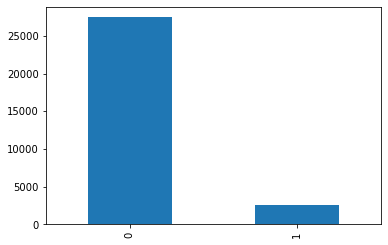

In [649]:
high_value_customer['Churn'].value_counts().plot(kind='bar')

In [650]:
high_value_customer['Churn'].value_counts()

0    27453
1     2527
Name: Churn, dtype: int64

In [651]:
churn_customer = high_value_customer[high_value_customer['Churn'] == 1]

In [652]:
## Using oversampling method for imbalance class handling

for i in range(1,3):
    high_value_customer1 = pd.concat([high_value_customer,churn_customer])

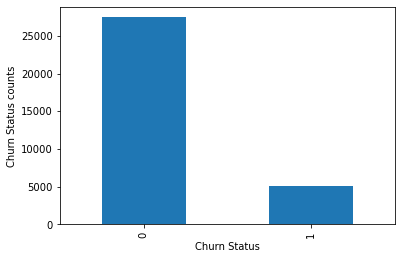

In [653]:
high_value_customer1['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn Status')
plt.ylabel('Churn Status counts')
plt.show()

In [654]:
high_value_customer1['Churn'].value_counts()

0    27453
1     5054
Name: Churn, dtype: int64

### Now building model by logistic regression

In [655]:
df_log = high_value_customer1.copy()

In [656]:
df_log.shape

(32507, 146)

In [657]:
## defining object for scaling

Scalar = StandardScaler()

In [658]:
scaling_list = list(df_log.columns)

In [659]:
df_log.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,1580,790,3638,1580,790,1580,0,0,779,1.0,1.0,2.0,152.0,152.0,152.0,1.0,1.0,1.0,0.0,0.0,0.0,154.0,154.0,179.0,0.0,0.00,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,437,601,120,90,154,30,50,0,10,1.0,2.0,3.0,152.0,154.0,23.0,1.0,2.0,3.0,0.0,0.0,0.0,154.0,177.0,69.0,0.0,356.00,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0
7000875565,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.9

In [660]:
## Differentiating categorial and continuous variable before scaling

cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

In [661]:
total_cols = df_log.columns

In [662]:
numeric_col = []

for i in total_cols:
    if i not in cat_cols:
        numeric_col.append(i)
        
numeric_col.remove('Churn')

In [663]:
df_log.shape

(32507, 146)

In [664]:
len(cat_cols) + len(numeric_col)

145

In [665]:
## Splitting data into train and test set 

df_train, df_test = train_test_split(df_log, train_size=0.70, random_state=100)

In [666]:
## Defining X and y for both train and test set 
y_train = df_train.pop('Churn')
X_train = df_train
y_test = df_test.pop('Churn')
X_test = df_test

In [667]:
## Scaling the continuous data columns

X_train[numeric_col] = Scalar.fit_transform(X_train[numeric_col])
X_test[numeric_col] = Scalar.transform(X_test[numeric_col])

In [668]:
X_train.shape

(22754, 145)

In [669]:
X_test.shape

(9753, 145)

In [670]:
## Using logistic regression for model building
logreg = LogisticRegression()

In [671]:
model_logistic = logreg.fit(X_train, y_train)

In [672]:
y_train_pred_logistic = model_logistic.predict_proba(X_train)

In [673]:
## Predicting y_train 

y_train_pred_logistic = y_train_pred_logistic[:,1]

In [674]:
### Computing accuracy

result_logistic_regression = pd.DataFrame()

In [675]:
result_logistic_regression['Actual'] = y_train
result_logistic_regression['Predicted_Probability'] = y_train_pred_logistic

In [676]:
result_logistic_regression['Predicted'] = result_logistic_regression['Predicted_Probability'].apply(lambda x:
                                                                                                   1 if x > 0.5 else 0)

In [677]:
result_logistic_regression.head()

,Actual,Predicted_Probability,Predicted
mobile_number,,,
7000347503,1,0.140484,0
7000887461,0,0.021216,0
7000541563,0,0.005582,0
7000057081,0,0.035527,0
7001364182,0,0.004392,0


In [678]:
print('======Accuracy Score======')
print(accuracy_score(result_logistic_regression['Actual'], result_logistic_regression['Predicted']))
print('=====ROC_AUC_SCORE=====')
print(roc_auc_score(result_logistic_regression['Actual'], result_logistic_regression['Predicted']))

======Accuracy Score======
0.9019513052650083
=====ROC_AUC_SCORE=====
0.7394066473473853


### Model evaulation on test set

In [679]:
y_test_pred_logistic_regression = model_logistic.predict_proba(X_test)

In [680]:
result_logistic_regression_test = pd.DataFrame()

In [681]:
result_logistic_regression_test['Actual'] = y_test

In [682]:
result_logistic_regression_test['Predicted_Probability'] = y_test_pred_logistic_regression[:,1]

In [683]:
result_logistic_regression_test['Predicted'] = result_logistic_regression_test['Predicted_Probability'].apply(lambda x:
                                                                                                   1 if x > 0.5 else 0)

In [684]:
result_logistic_regression_test.head()

,Actual,Predicted_Probability,Predicted
mobile_number,,,
7000869879,0,0.011355,0
7000803440,0,0.009089,0
7000478997,0,0.087240,0
7001262038,0,0.046870,0
7000638036,0,0.005108,0


In [685]:
print('======Accuracy Score======')
print(accuracy_score(result_logistic_regression_test['Actual'], result_logistic_regression_test['Predicted']))
print('=====ROC_AUC_SCORE=====')
print(roc_auc_score(result_logistic_regression_test['Actual'], result_logistic_regression_test['Predicted']))

======Accuracy Score======
0.8981851737926791
=====ROC_AUC_SCORE=====
0.7407267819121041


In [686]:
### Coefficient 

log_reg_coef = model_logistic.coef_[0]

In [687]:
logistic_regression_coef = pd.DataFrame(log_reg_coef,X_train.columns, columns=['Coef']).sort_values(by='Coef',
                                                                                                   ascending=False)
logistic_regression_coef.head(10)

,Coef
std_og_t2m_mou_8,3.254192
std_og_t2t_mou_8,3.041211
loc_ic_mou_8,1.410581
std_ic_mou_8,1.008647
isd_ic_mou_8,0.847990
loc_og_mou_8,0.843293
std_og_t2t_mou_6,0.685425
loc_ic_t2m_mou_8,0.645599
loc_ic_t2t_mou_8,0.638090
std_ic_t2m_mou_8,0.490509


### As per problem statement let's try with PCA for dimensionality reduction

In [688]:
df_pca = high_value_customer.copy()

In [689]:
df_pca.shape

(29980, 146)

In [690]:
## Splitting data into train and test set 

df_train_pca, df_test_pca = train_test_split(df_pca, train_size=0.70, random_state=100)

In [691]:

y_train_pca = df_train_pca.pop('Churn')
X_train_pca = df_train_pca
y_test_pca = df_test_pca.pop('Churn')
X_test_pca = df_test_pca

print(X_test_pca.shape)
print(y_test_pca.shape)

(8994, 145)
(8994,)


In [692]:
## Using PCA for dimensionality reduction 

pca = PCA(random_state=42)

In [693]:
## Scaling the continuous data columns 

X_train_pca[numeric_col] = Scalar.fit_transform(X_train_pca[numeric_col])
X_test_pca[numeric_col] = Scalar.transform(X_test_pca[numeric_col])
pca.fit(X_train_pca)

PCA(random_state=42)

In [694]:
pca_sum = np.cumsum(pca.explained_variance_ratio_)

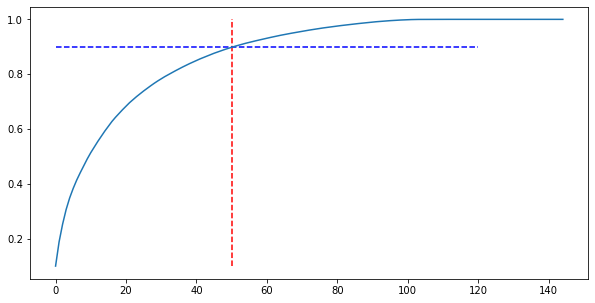

In [695]:
plt.figure(figsize=(10,5))
plt.plot(pca_sum)
plt.vlines(x=50, ymax=1, ymin=0.1, color='red', linestyles='--')
plt.hlines(y=0.9, xmin=0, xmax=120, colors='blue', linestyles='--')
plt.show()

In [696]:
## As by n_components=50 pca covered 90 percent variance in data

pca = IncrementalPCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_pca)

In [697]:
X_test_pca = pca.transform(X_test_pca)

In [698]:
X_train_pca.shape

(20986, 50)

In [699]:
column = []
for i in range(0,50):
    column.append('pca_{}'.format(i))

In [700]:
X_train_pca = pd.DataFrame(X_train_pca,columns=column)
X_test_pca = pd.DataFrame(X_test_pca, columns=column)

In [701]:
X_train_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49
0,3.136749,4.735261,2.674051,1.550472,1.806020,-1.653819,-2.501566,0.509411,0.220409,0.685600,0.411498,0.102825,-0.381806,-0.150533,0.068176,-1.032174,-0.899396,-0.160741,-0.038234,0.476550,0.400352,-0.004646,0.340176,0.052989,-0.392718,0.551193,-0.533340,-0.427807,0.987182,0.057511,1.343802,1.284793,-0.467085,-0.314925,-0.558962,-0.763492,1.043053,-0.486467,-0.536808,-0.700751,2.092537,-0.409529,-0.099577,0.066034,1.030372,0.144135,0.203623,-0.075949,0.031928,-0.649365
1,2.373001,-2.941147,1.985795,2.082700,-1.735145,0.823017,-1.352056,1.315003,0.623685,0.755305,-0.786387,1.557478,-0.925136,-0.506370,0.689495,-2.584095,0.271879,-0.933012,0.493747,0.535903,0.636859,3.401918,0.941614,0.218245,-0.349875,-0.040065,0.581758,1.788529,-2.063504,-0.863903,-0.333120,0.027941,-1.390202,-0.336113,0.249600,-0.534978,-0.693013,-1.545577,0.552261,-0.700834,0.647511,-0.289168,0.713034,-0.217383,-0.067990,-1.047551,0.436459,0.575565,1.243598,0.087332
2,-1.950003,-2.058774,2.191494,-1.505098,-1.241751,1.276099,0.365755,-0.455491,-1.011982,0.036519,-0.723347,-0.443282,0.152995,0.459671,-0.045087,-1.178934,-0.838282,0.188323,1.017232,0.286999,-0.095621,-0.810560,-0.316357,0.003195,1.584896,0.088645,-0.494589,1.924868,-0.832532,0.731890,-0.250690,-0.607694,-0.983576,0.715235,0.391654,0.535698,1.388974,0.430476,-0.390658,-0.145108,0.394859,-0.068416,1.363790,-0.294423,-0.470968,0.273498,0.334134,-0.115290,-0.098586,-0.206360
3,-0.195740,0.175643,0.378124,-2.248033,0.569954,-1.069641,0.908493,-0.545017,-1.695871,-1.530779,-0.232639,1.083981,0.677416,-0.283622,0.283422,0.053856,-0.165013,-0.056568,-0.729923,0.144132,-0.059632,-0.207554,-1.478277,0.239945,-0.772426,-0.372041,0.362934,0.119446,0.324365,0.343921,-0.183554,1.256613,-0.334137,0.322031,0.308796,-0.131308,-0.582001,-0.027915,0.523836,-0.089729,-0.801594,-0.899869,-0.055416,-1.180557,-0.512785,-1.069118,0.075282,-0.305682,0.753974,-0.242042
4,2.658343,-0.831816,-1.620617,0.684601,-3.667832,3.243970,3.007148,2.275855,-2.094326,2.007297,-2.402879,2.432461,1.402105,-0.077429,1.988038,-1.893886,-2.158644,-0.091926,0.915425,0.113692,0.237637,-0.263977,0.036459,0.475245,-0.346650,0.678249,-0.749791,-0.246770,-0.245465,1.129664,0.510442,0.878721,-0.177927,0.019396,-1.920326,2.707517,-2.146077,-0.744313,-0.398214,-0.988958,-0.160313,0.288595,-0.394544,-2.277057,0.641536,-1.418742,-0.084269,1.792130,1.353987,0.640444


### Hyperparameter tunning for Random Forest



In [702]:
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {'max_depth': [2, 3, 4, 7, 9], 
         'min_samples_leaf' : [5, 10, 15, 18, 25], 
         'max_features': [2, 3, 4], 
         'n_estimators': [10, 20, 30, 50, 100]}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train_pca,y_train_pca)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 7, 9],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 15, 18, 25],
                         'n_estimators': [10, 20, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [703]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=9, max_features=4, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [704]:
rf_classifier_2 = RandomForestClassifier(max_depth=9, max_features=4, min_samples_leaf=5, 
                                         n_estimators=30, n_jobs=-1, random_state=42)

In [705]:
rf_classifier_2.fit(X_train_pca,y_train_pca)

RandomForestClassifier(max_depth=9, max_features=4, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [706]:
y_train_pred_pca = rf_classifier_2.predict_proba(X_train_pca)

In [707]:
y_train_pred_pca = y_train_pred_pca[:,1]

### Model evaluation on test set

In [708]:
y_test_pred_pca = rf_classifier_2.predict_proba(X_test_pca)

In [709]:
y_test_pred_pca = y_test_pred_pca[:,1]

### Calculating accuracy metrics on train and test set

In [710]:
df_train_result = pd.DataFrame()
df_train_result['Actual'] = y_train_pca
df_train_result['Predicted_Probability'] = y_train_pred_pca

In [711]:
df_test_result = pd.DataFrame()
df_test_result['Actual'] = y_test_pca
df_test_result['Predicted_Probability'] = y_test_pred_pca

In [712]:
df_train_result.head()

,Actual,Predicted_Probability
mobile_number,,
7000808029,0,0.088326
7000913170,0,0.041894
7001950553,0,0.069329
7000737378,0,0.027595
7001412174,0,0.019934


In [713]:
df_test_result.head()

,Actual,Predicted_Probability
mobile_number,,
7001001973,0,0.010217
7000906104,0,0.031547
7001822114,1,0.288348
7002058405,0,0.042036
7001933701,0,0.010580


In [714]:
df_train_result['Predicted'] = df_train_result['Predicted_Probability'].apply(lambda x: 1 if x > 0.5 else 0)
df_test_result['Predicted'] = df_test_result['Predicted_Probability'].apply(lambda x: 1 if x > 0.5 else 0)

In [715]:
df_train_result.head()

,Actual,Predicted_Probability,Predicted
mobile_number,,,
7000808029,0,0.088326,0
7000913170,0,0.041894,0
7001950553,0,0.069329,0
7000737378,0,0.027595,0
7001412174,0,0.019934,0


In [716]:
df_test_result.head()

,Actual,Predicted_Probability,Predicted
mobile_number,,,
7001001973,0,0.010217,0
7000906104,0,0.031547,0
7001822114,1,0.288348,0
7002058405,0,0.042036,0
7001933701,0,0.010580,0


In [717]:
print('====Accuracy Score of train set====')
print(accuracy_score(df_train_result['Actual'],df_train_result['Predicted']))
print()
print('====ROC_AUC_SCORE train set====')
print(roc_auc_score(df_train_result['Actual'],df_train_result['Predicted']))
print()

print('====Accuracy Score of test set====')
print(accuracy_score(df_test_result['Actual'],df_test_result['Predicted']))
print()
print('====ROC_AUC_SCORE test set====')
print(roc_auc_score(df_test_result['Actual'],df_test_result['Predicted']))

====Accuracy Score of train set====
0.9253788239778901

====ROC_AUC_SCORE train set====
0.5659628866184336

====Accuracy Score of test set====
0.9189459639759839

====ROC_AUC_SCORE test set====
0.5248057535436326
